# Calculate signatures for cDC2A and cDC2B from the datasets used in Brown et al. 2019 (Human spleen) and Minutti et al 2024. (Human BM) to see if they align with the CD207+ DC in our cancer myeloid APC atlas

``` bash
rsync -azvhp /QRISdata/Q5935/for_nikita/dc_scRNA/notebook/ /scratch/user/s4436039/scdata/Brown_Minutti_Data/
```

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

from scipy.stats import zscore

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Brown_Minutti_Data/')
os.getcwd()

'/scratch/user/s4436039/scdata/Brown_Minutti_Data'

In [3]:
data_Brown = sc.read_h5ad('brown_GSE137710.h5ad') #mouse BM, lung, spleen data with genes converted to human format
data_Minutti = sc.read_h5ad('minutti_GSE217328_humanized.h5ad') #human spleen data (from sorted pre-cDCs)

# Calculate DEG genes from Brown et al

In [4]:
data_Brown

AnnData object with n_obs × n_vars = 5110 × 16328
    obs: 'tissue', 'background', 'total_counts', 'mitochondrial_fraction', 'cell_type', 'cluster', 'tsne_x', 'tsne_y'
    uns: 'cell_type_colors', 'log1p'
    obsm: 'X_tsne'
    layers: 'counts'

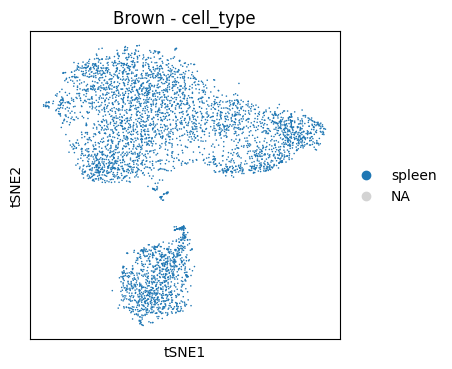

In [5]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.tsne(data_Brown, color=["tissue"], ncols = 1, size=5, title="Brown - cell_type")

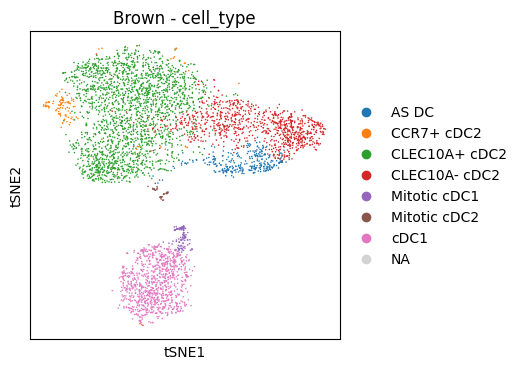

In [6]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.tsne(data_Brown, color=["cell_type"], ncols = 1, size=5, title="Brown - cell_type")

In [7]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data_Brown, groupby="cell_type", key_added="NR_degs", method="wilcoxon") 

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 16328 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


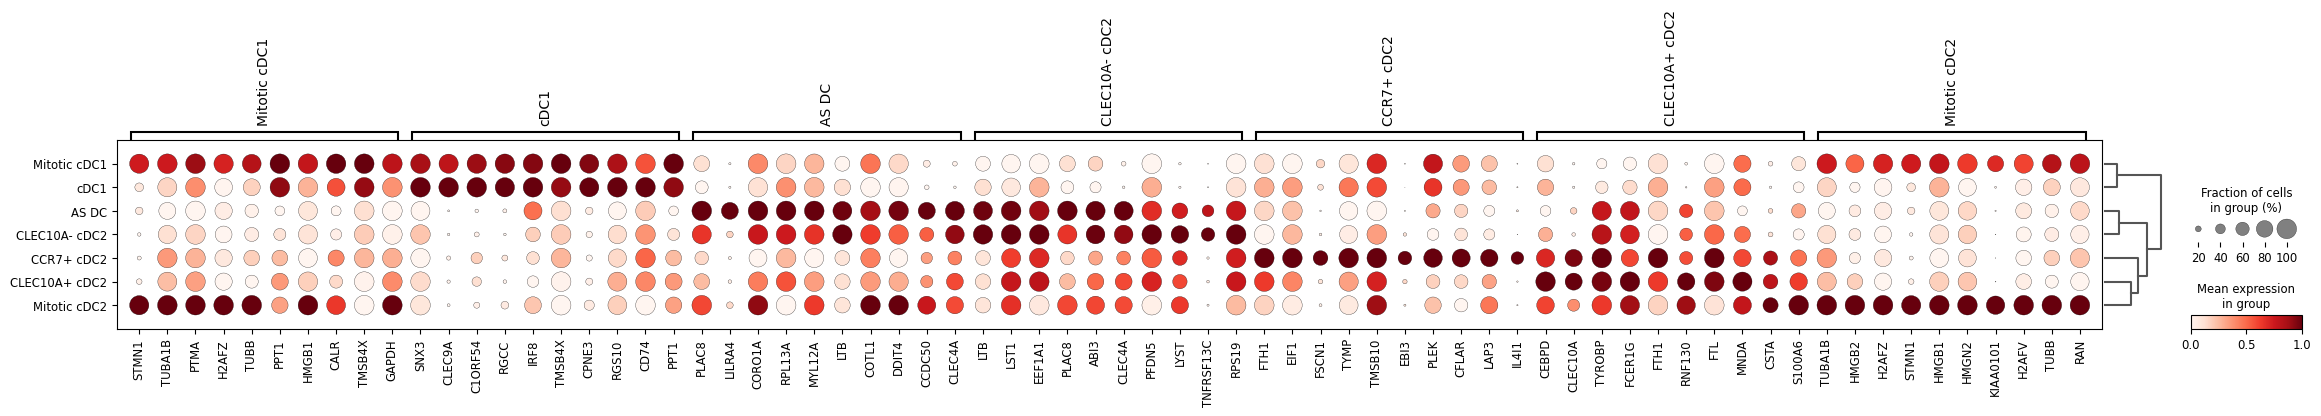

In [13]:
sc.pl.rank_genes_groups_dotplot(data_Brown, groupby="cell_type", key="NR_degs", standard_scale="var", n_genes=10)

In [14]:
# save DEGs for cDC2A (CLEC10A-) and cDC2B (CLEC10A+)

#cDC2A
Brown_DC2A_Degs = sc.get.rank_genes_groups_df(data_Brown, group="CLEC10A- cDC2", key="NR_degs")
#DC2B 
Brown_DC2B_Degs = sc.get.rank_genes_groups_df(data_Brown, group="CLEC10A+ cDC2", key="NR_degs")

In [15]:
Brown_DC2A_Degs.head()

names     scores  logfoldchanges          pvals      pvals_adj
0     LTB  35.557755        3.261108  6.305311e-277  5.147656e-273
1    LST1  32.424171        1.244492  1.252921e-230  6.819230e-227
2  EEF1A1  26.445158        0.353206  4.147887e-154  7.525188e-151
3   PLAC8  25.809767        1.588037  6.889154e-147  1.022601e-143
4    ABI3  25.791990        1.359329  1.090547e-146  1.483871e-143

In [16]:
Brown_DC2B_Degs.head()

names     scores  logfoldchanges          pvals      pvals_adj
0    CEBPD  43.280067        2.334172   0.000000e+00   0.000000e+00
1  CLEC10A  42.211887        3.472476   0.000000e+00   0.000000e+00
2   TYROBP  37.805786        1.778822   0.000000e+00   0.000000e+00
3   FCER1G  33.804089        1.459554  1.717459e-250  7.010667e-247
4     FTH1  33.782730        0.614078  3.536714e-250  1.154949e-246

In [17]:
# change any p values that are 0.0 to 1e-307 (lowest that excel can display)
min_float = 1e-307
Brown_DC2A_Degs['pvals'] = Brown_DC2A_Degs['pvals'].replace(0.0, min_float)
Brown_DC2A_Degs['pvals_adj'] = Brown_DC2A_Degs['pvals_adj'].replace(0.0, min_float)

Brown_DC2B_Degs['pvals'] = Brown_DC2B_Degs['pvals'].replace(0.0, min_float)
Brown_DC2B_Degs['pvals_adj'] = Brown_DC2B_Degs['pvals_adj'].replace(0.0, min_float)

In [18]:
Brown_DC2B_Degs.head()

names     scores  logfoldchanges          pvals      pvals_adj
0    CEBPD  43.280067        2.334172  1.000000e-307  1.000000e-307
1  CLEC10A  42.211887        3.472476  1.000000e-307  1.000000e-307
2   TYROBP  37.805786        1.778822  1.000000e-307  1.000000e-307
3   FCER1G  33.804089        1.459554  1.717459e-250  7.010667e-247
4     FTH1  33.782730        0.614078  3.536714e-250  1.154949e-246

In [19]:
#export degs to csv
Brown_DC2A_Degs.to_csv("Brown_DEGs_cDC2A.csv", index=False)
Brown_DC2B_Degs.to_csv("Brown_DEGs_cDC2B.csv", index=False)

# Calculate DEG genes from Minutti

In [7]:
data_Minutti

AnnData object with n_obs × n_vars = 10253 × 19513
    obs: 'tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Early pre-cDCs', 'Late pre-cDCs', 'Proliferation', 'pre-cDC1s', 'pre-cDC2s', 'cDC2a', 'cDC2b', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'original_gene_symbol'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

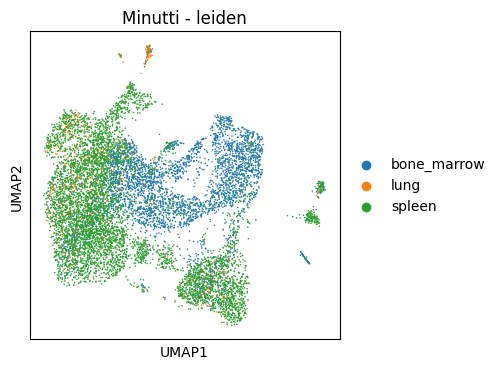

In [8]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_Minutti, color=["tissue"], ncols = 1, size=5, title="Minutti - leiden")

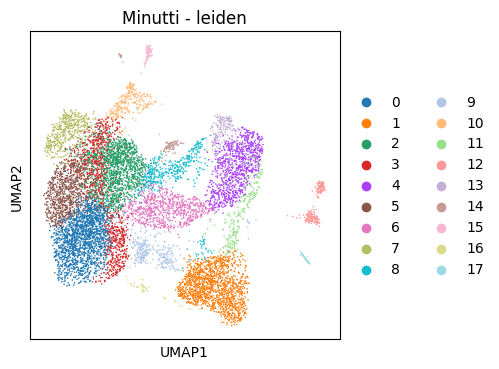

In [9]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_Minutti, color=["leiden"], ncols = 1, size=5, title="Minutti - leiden")
# KT overlaid signatures from Minutti et al (see minutti_GSE217328.jpynb) and determined cluster 10 is cDC2A and cluster 2 is cDc2B

In [45]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data_Minutti, groupby="leiden", key_added="NR_degs", method="wilcoxon") 

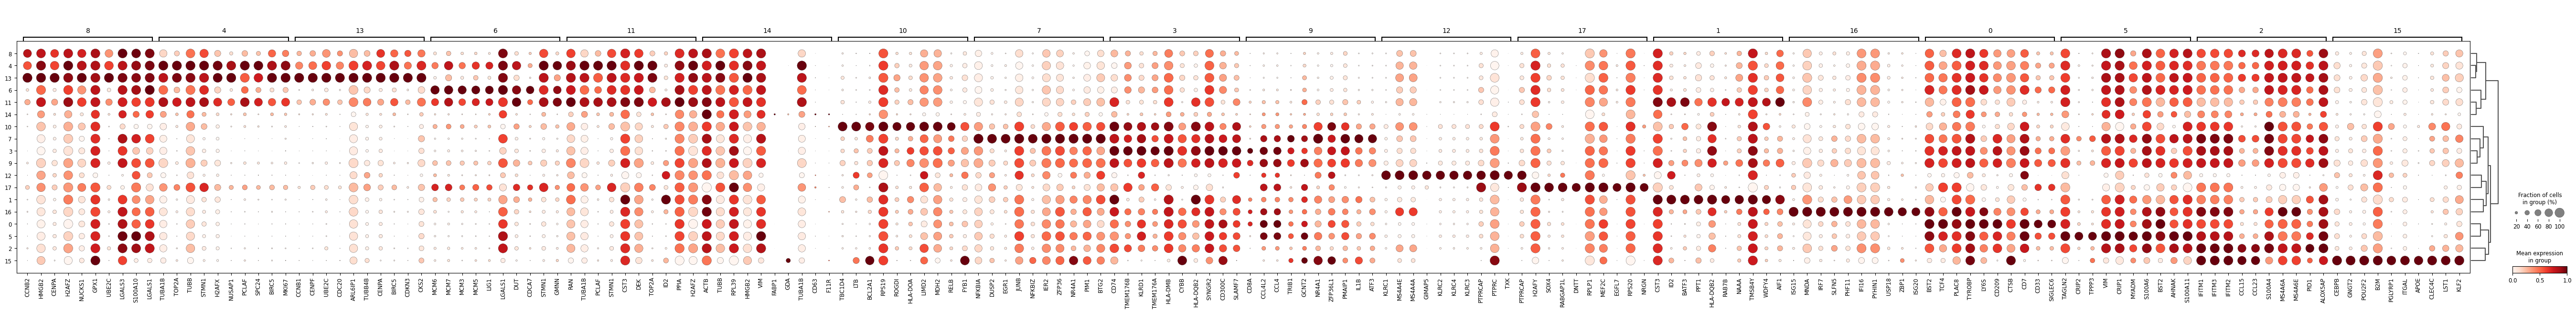

In [46]:
sc.pl.rank_genes_groups_dotplot(data_Minutti, groupby="leiden", key="NR_degs", standard_scale="var", n_genes=10)

In [47]:
# save DEGs for cDC2A (cluster 10) and cDC2B (cluster 2)

#cDC2A
Minutti_mouse_DC2A_Degs = sc.get.rank_genes_groups_df(data_Minutti, group="10", key="NR_degs")
#DC2B 
Minutti_mouse_DC2B_Degs = sc.get.rank_genes_groups_df(data_Minutti, group="2", key="NR_degs")

In [48]:
Minutti_mouse_DC2A_Degs.head()

names     scores  logfoldchanges          pvals      pvals_adj
0  TBC1D4  26.238546        5.734086  9.658406e-152  9.423224e-148
1     LTB  25.935469        5.374140  2.652337e-148  1.725169e-144
2  BCL2A1  22.542812        5.194233  1.579589e-112  4.403216e-109
3   RPS19  22.008713        0.732568  2.376422e-107  4.637112e-104
4   ROGDI  21.166584        3.206660   1.941315e-99   2.525392e-96

In [49]:
Minutti_mouse_DC2B_Degs.head()

names     scores  logfoldchanges          pvals      pvals_adj
0  IFITM1  36.629726        3.276567  9.623952e-294  6.259739e-290
1  IFITM3  36.629726        3.276567  9.623952e-294  6.259739e-290
2  IFITM2  36.629726        3.276567  9.623952e-294  6.259739e-290
3   CCL15  35.286076        2.734690  9.602991e-273  3.747663e-269
4   CCL23  35.286076        2.734690  9.602991e-273  3.747663e-269

In [50]:
# change any p values that are 0.0 to 1e-307 (lowest that excel can display)
min_float = 1e-307
Minutti_mouse_DC2A_Degs['pvals'] = Minutti_mouse_DC2A_Degs['pvals'].replace(0.0, min_float)
Minutti_mouse_DC2A_Degs['pvals_adj'] = Minutti_mouse_DC2A_Degs['pvals_adj'].replace(0.0, min_float)

Minutti_mouse_DC2B_Degs['pvals'] = Minutti_mouse_DC2B_Degs['pvals'].replace(0.0, min_float)
Minutti_mouse_DC2B_Degs['pvals_adj'] = Minutti_mouse_DC2B_Degs['pvals_adj'].replace(0.0, min_float)

In [51]:
#export degs to csv
Minutti_mouse_DC2A_Degs.to_csv("Minutti_Mouse_DEGs_cDC2A.csv", index=False)
Minutti_mouse_DC2B_Degs.to_csv("Minutti_Mouse_DEGs_cDC2B.csv", index=False)

# Overlay sigs on my atlas

In [4]:
data_DC2 = sc.read_h5ad('/scratch/user/s4436039/scdata/Myeloid_Objects/20250629_DC2_bbknn_clustered2.h5ad') 

In [52]:
# overlay Moon et al 2025 sigs
Brown_cDC2A = ['LTB','LST1','PLAC8','ABI3','CLEC4A','LYST','TNFRSF13C','FAM110A','CORO1A','ABHD6','VASP','AAAS','HIC1','GDI2','LITAF','RPS6KA4','LINC01531','FAM107B','FAM26F','HES4','MAP3K8','FYB','RAC2','BCL2A1','GABARAPL2','CTD-2006K23.1','NCF1','PTPRC','CA2','PTPN6','GSN','CFP','SH3D21','SNAP29','TMEM14C','HCK','CD300A','PAK1','RGS19','EVA1B','IFITM2','FXYD5','CD53','ITM2C','LSM10','FCMR','RUNX3','PLD4','OAZ2','CLN8','PMAIP1','SMIM14','CIB1','IL22RA2','TNFAIP2','FGR','TNNI2','ITGAX','LILRB1','CEACAM1','CD52','CPPED1','ACAA1','C11ORF31','SYNGR2','JAML','LRRC25','ADGRE5','ENTPD1','NR4A3','ARHGAP9','CD3E','AREG','SCLT1','INPP4A','RP11-596C23.2','ADA','SPATS2L','SEPT1','NCF2','RHOH','STK4','C12ORF10','UBE2E2','DEGS1','MARCKSL1','KLF4','CCDC50','STK40','GHRL','CASP4','DRAM2','SLC38A1','HSPA1B','TBC1D9','LY6E','IDO1','USF2','CD300LF','FAM65B'] 
Brown_cDC2B = ['CEBPD','CLEC10A','TYROBP','FCER1G','FTH1','RNF130','FTL','MNDA','CSTA','S100A6','SERPINA1','AIF1','ANXA1','S100A11','CARD16','CASP1','IL1R2','TIMP1','ZFP36L2','CEBPB','CD1C','IL1B','CTSS','S100A4','HCST','RNASE6','IFITM3','IGSF6','SMAP2','ITM2B','TNFSF13B','FCER1A','SH3BGRL3','JAML','CD33','TXNIP','CD1D','DOK2','ETS2','GIMAP4','CFP','TSPO','CD52','PILRA','FOS','ALDH2','FKBP1A','SERP1','RAC1','CTSH','RGS2','PDK4','SGK1','NPC2','ZFP36','TKT','EMP3','ETHE1','SNX10','HMGB2','GLUL','PID1','ZFAND5','NDUFA12','IL13RA1','LGALS3','ZEB2','MS4A6A','AP1S2','PHACTR1','IFITM2','GIMAP7','IFI30','CASP4','PRELID1','FAM26F','ANXA5','CACNA2D3','KLF2','SEC11A','CD1E','ARRB2','ATF3','C1QA','CAMK1','GLRX','FCGR2B','TNFAIP8L2','KCTD12','MS4A7','SUPT4H1','NDFIP1','HSD17B11','CXCR4','IL18','CSF1R','FIS1','TNFRSF1B','JUNB','FYB']
Minutti_cDC2A = ['TBC1D4','LTB','BCL2A1','RPS19','ROGDI','HLA-DOA','LIMD2','MDH2','RELB','FYB1','B2M','AVPI1','RUNX3','CD74','REL','PTPRC','LST1','HLA-DQB2','SERPINA3','RGS2','LCP1','CIITA','TSPAN13','CCND1','PRKCB','TRAF1','RASGEF1B','S100A4','ADAM23','ZFP36L1','C1orf162','KNOP1','HAUS8','STAP1','FOSB','LYST','DENND4A','FFAR2','TMEM176B','PGLYRP1','RGS12','SIRPB1','SIRPG','SIRPA','TMEM176A','GNGT2','MED30','FAM49A','KIT','ITGA4','PTGS2','MARCKSL1','CD83','HLA-DMB','HLA-DOB','ATOX1','PLXNC1','NAV1','GSN','PPP1R14A','PPDPF','NEDD4','CLEC4C','CYP4F8','RGS1','BASP1','FBRSL1','PRDX6','ELK3','TMEM131L','DDX5','AEBP2','MAN1A1','NR4A1','STK17B','CYB5R3','TCTEX1D2','KLRD1','IL2RG','UBE2E2','NFKB1','MTHFS','SOX4','CHD3','ASB2','MS4A4A','MS4A4E','CHKA','PLEK','DNMT3A','SIGLEC10','SIGLEC16','SIGLEC11','MALT1','MYCBP2','SLC38A2','TES','GABARAPL2','ELMO1','MARCKS'] 
Minutti_cDC2B = ['IFITM1','IFITM3','IFITM2','CCL15','CCL23','S100A4','MS4A6A','MS4A6E','PID1','ALOX5AP','NCF2','CD52','S100A10','SELENOP','AHNAK','LGALS3','S100A6','EMB','CCR2','PYHIN1','IFI16','GPR141','VIM','MS4A4A','MS4A4E','LIMD2','ITGB7','ANXA1','TXNIP','CLEC4C','SLFN12','SLFN12L','KCNE3','PYCARD','POU2F2','FCER1G','RASSF4','PLD4','CAMKK2','SMIM5','RSRP1','CX3CR1','LST1','LAMP1','SCPEP1','LAT2','SLFN5','HPGD','LMO4','ANXA2','TM6SF1','RARA','TSC22D3','TNFAIP8L2','ENO1','HCK','DOK3','CD209','CEBPD','EMILIN2','NUPR1','IL6R','FN1','IGSF6','TMEM176B','RBFA','LMO1','VSIR','LGALS1','MILR1','SAMD9L','ZEB2','MYCBP2','STXBP6','L1CAM','MACF1','BORCS6','CD300LG','ADD3','MCUB','RIN3','CLEC4A','GGH','ITGAM','DUSP22','MGST3','TNFAIP2','PTPRO','F13A1','RAPH1','MCEMP1','DDIT4','TCP11L2','FKBP1B','KLK8','PLEC','TRPS1','IL13RA1','SNX21','GSTO1']

In [53]:
# Define dictionary of gene sets
gene_sets = {
    "Brown_cDC2A_sig": Brown_cDC2A,
    "Brown_cDC2B_sig": Brown_cDC2B,
    "Minutti_cDC2A_sig": Minutti_cDC2A,
    "Minutti_cDC2B_sig": Minutti_cDC2B
}

In [54]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

       'JAML', 'ADGRE5', 'RP11-596C23.2', 'SEPT1', 'C12ORF10', 'FAM65B'],
      dtype='object')
       'MCEMP1'],
      dtype='object')


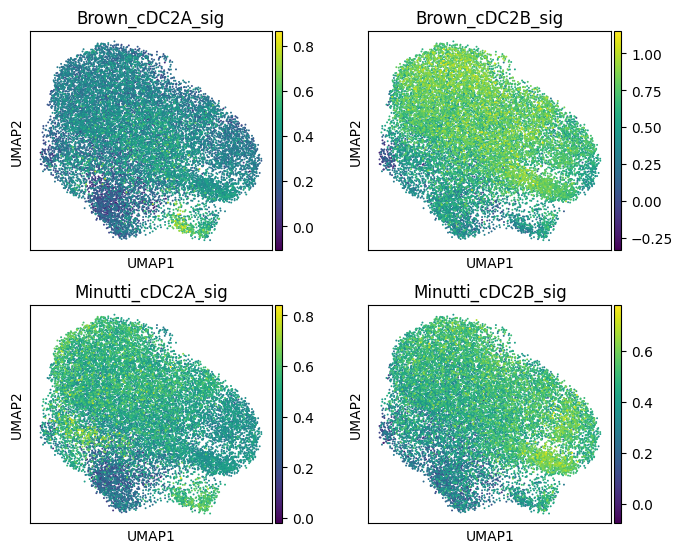

In [56]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=gene_sets, ncols=2, size=8)
    #sc.pl.umap(data_DC2, color=gene_sets, ncols=3, size=8, save="_cDC2_Moon_Sigs.svg")

In [57]:
colour_vars = ["Brown_cDC2A_sig","Brown_cDC2B_sig","Minutti_cDC2A_sig","Minutti_cDC2B_sig"]

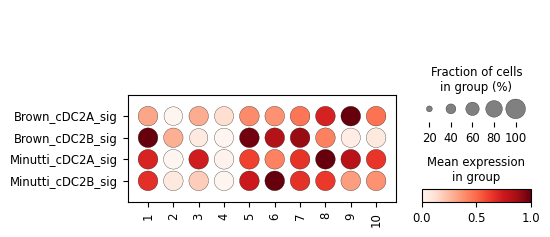

In [58]:
sc.pl.dotplot(data_DC2, colour_vars, groupby="cDC2_Atlas_Subclusters", standard_scale="var", swap_axes=True)

In [63]:
# CD207+ / cDC2A sigs
DC_CD207_Moon = ['CD1A','CD207','FCGBP','LTB','SPI1','S100B'] 
DC2_CD207_Gui = ['CD207','CD1A'] 
DC2_CD1A_Cheng = ['CD207','CD1A','S100B','LTB'] 
cDC2A_Minutti_Short = ['CLEC4A','LTB','IL22RA2','CD3E']
cDC2B_Minutti_Short = ['CEBPD','IL1R2','FCER1A','FCN1','IL1B','CD1C','CEBPB','CLEC10A']

# overlay Moon et al 2025 sigs
Brown_cDC2A_Degs = ['LTB','LST1','PLAC8','ABI3','CLEC4A','LYST','TNFRSF13C','FAM110A','CORO1A','ABHD6','VASP','AAAS','HIC1','GDI2','LITAF','RPS6KA4','LINC01531','FAM107B','FAM26F','HES4','MAP3K8','FYB','RAC2','BCL2A1','GABARAPL2','CTD-2006K23.1','NCF1','PTPRC','CA2','PTPN6','GSN','CFP','SH3D21','SNAP29','TMEM14C','HCK','CD300A','PAK1','RGS19','EVA1B','IFITM2','FXYD5','CD53','ITM2C','LSM10','FCMR','RUNX3','PLD4','OAZ2','CLN8','PMAIP1','SMIM14','CIB1','IL22RA2','TNFAIP2','FGR','TNNI2','ITGAX','LILRB1','CEACAM1','CD52','CPPED1','ACAA1','C11ORF31','SYNGR2','JAML','LRRC25','ADGRE5','ENTPD1','NR4A3','ARHGAP9','CD3E','AREG','SCLT1','INPP4A','RP11-596C23.2','ADA','SPATS2L','SEPT1','NCF2','RHOH','STK4','C12ORF10','UBE2E2','DEGS1','MARCKSL1','KLF4','CCDC50','STK40','GHRL','CASP4','DRAM2','SLC38A1','HSPA1B','TBC1D9','LY6E','IDO1','USF2','CD300LF','FAM65B'] 
Brown_cDC2B_Degs = ['CEBPD','CLEC10A','TYROBP','FCER1G','FTH1','RNF130','FTL','MNDA','CSTA','S100A6','SERPINA1','AIF1','ANXA1','S100A11','CARD16','CASP1','IL1R2','TIMP1','ZFP36L2','CEBPB','CD1C','IL1B','CTSS','S100A4','HCST','RNASE6','IFITM3','IGSF6','SMAP2','ITM2B','TNFSF13B','FCER1A','SH3BGRL3','JAML','CD33','TXNIP','CD1D','DOK2','ETS2','GIMAP4','CFP','TSPO','CD52','PILRA','FOS','ALDH2','FKBP1A','SERP1','RAC1','CTSH','RGS2','PDK4','SGK1','NPC2','ZFP36','TKT','EMP3','ETHE1','SNX10','HMGB2','GLUL','PID1','ZFAND5','NDUFA12','IL13RA1','LGALS3','ZEB2','MS4A6A','AP1S2','PHACTR1','IFITM2','GIMAP7','IFI30','CASP4','PRELID1','FAM26F','ANXA5','CACNA2D3','KLF2','SEC11A','CD1E','ARRB2','ATF3','C1QA','CAMK1','GLRX','FCGR2B','TNFAIP8L2','KCTD12','MS4A7','SUPT4H1','NDFIP1','HSD17B11','CXCR4','IL18','CSF1R','FIS1','TNFRSF1B','JUNB','FYB']
Minutti_cDC2A_Degs = ['TBC1D4','LTB','BCL2A1','RPS19','ROGDI','HLA-DOA','LIMD2','MDH2','RELB','FYB1','B2M','AVPI1','RUNX3','CD74','REL','PTPRC','LST1','HLA-DQB2','SERPINA3','RGS2','LCP1','CIITA','TSPAN13','CCND1','PRKCB','TRAF1','RASGEF1B','S100A4','ADAM23','ZFP36L1','C1orf162','KNOP1','HAUS8','STAP1','FOSB','LYST','DENND4A','FFAR2','TMEM176B','PGLYRP1','RGS12','SIRPB1','SIRPG','SIRPA','TMEM176A','GNGT2','MED30','FAM49A','KIT','ITGA4','PTGS2','MARCKSL1','CD83','HLA-DMB','HLA-DOB','ATOX1','PLXNC1','NAV1','GSN','PPP1R14A','PPDPF','NEDD4','CLEC4C','CYP4F8','RGS1','BASP1','FBRSL1','PRDX6','ELK3','TMEM131L','DDX5','AEBP2','MAN1A1','NR4A1','STK17B','CYB5R3','TCTEX1D2','KLRD1','IL2RG','UBE2E2','NFKB1','MTHFS','SOX4','CHD3','ASB2','MS4A4A','MS4A4E','CHKA','PLEK','DNMT3A','SIGLEC10','SIGLEC16','SIGLEC11','MALT1','MYCBP2','SLC38A2','TES','GABARAPL2','ELMO1','MARCKS'] 
Minutti_cDC2B_Degs = ['IFITM1','IFITM3','IFITM2','CCL15','CCL23','S100A4','MS4A6A','MS4A6E','PID1','ALOX5AP','NCF2','CD52','S100A10','SELENOP','AHNAK','LGALS3','S100A6','EMB','CCR2','PYHIN1','IFI16','GPR141','VIM','MS4A4A','MS4A4E','LIMD2','ITGB7','ANXA1','TXNIP','CLEC4C','SLFN12','SLFN12L','KCNE3','PYCARD','POU2F2','FCER1G','RASSF4','PLD4','CAMKK2','SMIM5','RSRP1','CX3CR1','LST1','LAMP1','SCPEP1','LAT2','SLFN5','HPGD','LMO4','ANXA2','TM6SF1','RARA','TSC22D3','TNFAIP8L2','ENO1','HCK','DOK3','CD209','CEBPD','EMILIN2','NUPR1','IL6R','FN1','IGSF6','TMEM176B','RBFA','LMO1','VSIR','LGALS1','MILR1','SAMD9L','ZEB2','MYCBP2','STXBP6','L1CAM','MACF1','BORCS6','CD300LG','ADD3','MCUB','RIN3','CLEC4A','GGH','ITGAM','DUSP22','MGST3','TNFAIP2','PTPRO','F13A1','RAPH1','MCEMP1','DDIT4','TCP11L2','FKBP1B','KLK8','PLEC','TRPS1','IL13RA1','SNX21','GSTO1']

In [68]:
# Define dictionary of gene sets
gene_sets = {
    "DC_CD207_Moon": DC_CD207_Moon,
    "DC2_CD207_Gui": DC2_CD207_Gui,
    "DC2_CD1A_Cheng": DC2_CD1A_Cheng,
    "cDC2A_Minutti_Short": cDC2A_Minutti_Short,
    "cDC2B_Minutti_Short": cDC2B_Minutti_Short,
    "Brown_cDC2A_Degs": Brown_cDC2A_Degs,
    "Minutti_Mouse_cDC2A_Degs": Minutti_cDC2A_Degs,
    "Brown_cDC2B_Degs": Brown_cDC2B_Degs,
    "Minutti_Mouse_cDC2B_Degs": Minutti_cDC2B_Degs
}

In [71]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

       'JAML', 'ADGRE5', 'RP11-596C23.2', 'SEPT1', 'C12ORF10', 'FAM65B'],
      dtype='object')
       'MCEMP1'],
      dtype='object')


In [72]:
colour_vars = ["DC_CD207_Moon","DC2_CD207_Gui","DC2_CD1A_Cheng","cDC2A_Minutti_Short","cDC2B_Minutti_Short","Brown_cDC2A_Degs","Minutti_Mouse_cDC2A_Degs","Brown_cDC2B_Degs","Minutti_Mouse_cDC2B_Degs"]

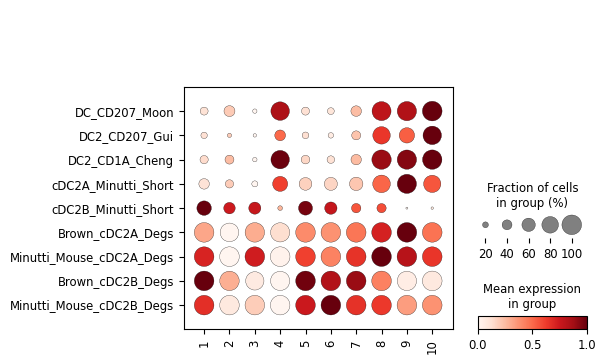

In [73]:
sc.pl.dotplot(data_DC2, colour_vars, groupby="cDC2_Atlas_Subclusters", standard_scale="var", swap_axes=True)

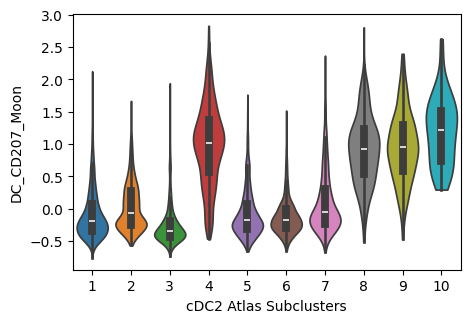

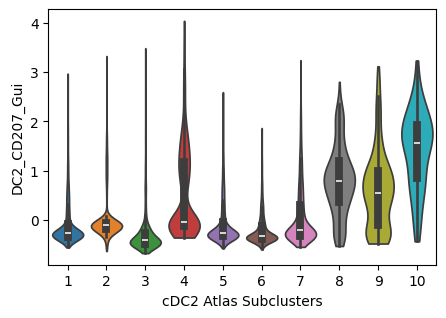

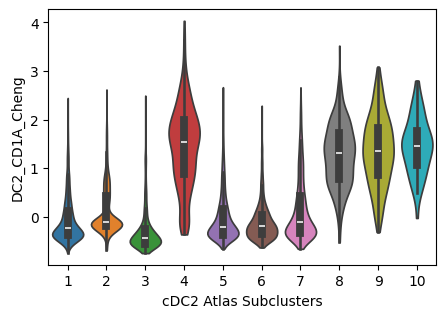

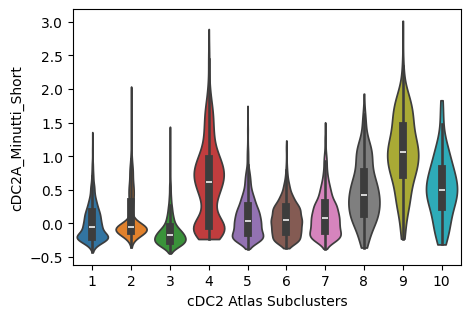

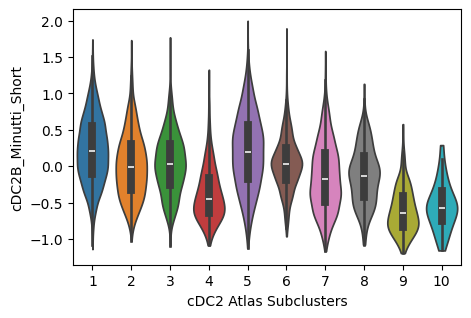

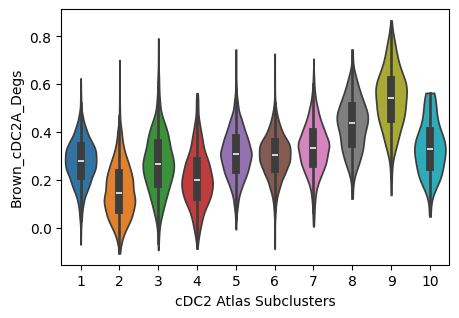

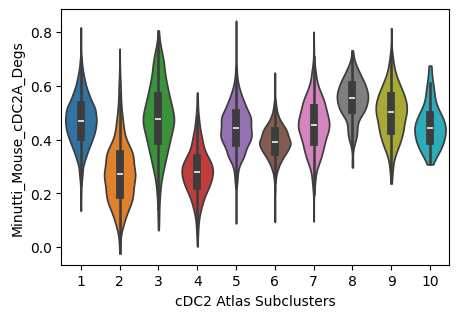

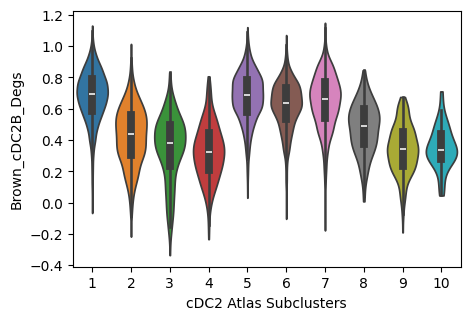

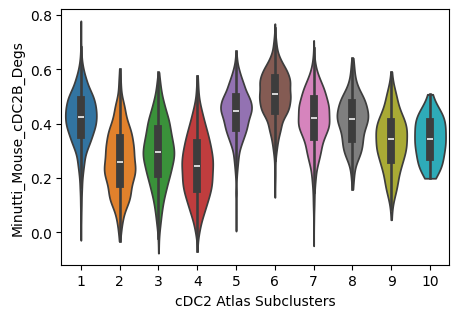

In [74]:
with plt.rc_context({"figure.figsize": (5, 3.5)}):
    for gene in gene_sets.keys():
        sc.pl.violin(
            data_DC2,
            keys=gene,
            groupby='cDC2_Atlas_Subclusters',
            stripplot=False,
            inner='box',
            show=True
            #save=f"_DC2_sigoverlay_Violin_{gene}.svg"
        )

# Make heatmap figure --> showing my cDC2A/B sigs (calculated from atlas) on these datasets

In [5]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

## Standardise datasets - make a metadata column in each called NR_cDC2AB and subset each to only cDC2A and B

### Brown:

In [6]:
data_Brown.obs["cell_type"].value_counts()

cell_type
CLEC10A+ cDC2    2074
cDC1              916
CLEC10A- cDC2     911
AS DC             302
CCR7+ cDC2        117
Mitotic cDC1      107
Mitotic cDC2       38
Name: count, dtype: int64

In [7]:
# subset to just cDC2 A and B
data_Brown_AB = data_Brown[data_Brown.obs["cell_type"].isin(["CLEC10A+ cDC2", "CLEC10A- cDC2"])]

In [8]:
data_Brown_AB.obs["cell_type"].value_counts()

cell_type
CLEC10A+ cDC2    2074
CLEC10A- cDC2     911
Name: count, dtype: int64

In [9]:
# make new meta column
data_Brown_AB.obs["NR_cDC2AB"] = data_Brown_AB.obs["cell_type"].map(
    {
        "CLEC10A+ cDC2": "cDC2B",
        "CLEC10A- cDC2": "cDC2A"
    }
)

/scratch/temp/14959507/ipykernel_2529343/1171511707.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data_Brown_AB.obs["NR_cDC2AB"] = data_Brown_AB.obs["cell_type"].map(


In [10]:
data_Brown_AB.obs["NR_cDC2AB"].value_counts()

NR_cDC2AB
cDC2B    2074
cDC2A     911
Name: count, dtype: int64

### Minutti:

In [11]:
data_Minutti.obs["leiden"].value_counts()

leiden
0     1677
1     1413
2     1392
3      974
4      890
5      794
6      758
7      461
8      442
9      311
10     266
11     253
12     204
13     157
14     102
15      79
16      41
17      39
Name: count, dtype: int64

In [12]:
# subset to just cDC2 A and B
data_Minutti_AB = data_Minutti[data_Minutti.obs["leiden"].isin(["10", "2"])]

In [13]:
data_Minutti_AB.obs["leiden"].value_counts()

leiden
2     1392
10     266
Name: count, dtype: int64

In [14]:
# make new meta column
data_Minutti_AB.obs["NR_cDC2AB"] = data_Minutti_AB.obs["leiden"].map(
    {
        "2": "cDC2B",
        "10": "cDC2A"
    }
)

/scratch/temp/14959507/ipykernel_2529343/240489319.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data_Minutti_AB.obs["NR_cDC2AB"] = data_Minutti_AB.obs["leiden"].map(


In [15]:
data_Minutti_AB.obs["NR_cDC2AB"].value_counts()

NR_cDC2AB
cDC2B    1392
cDC2A     266
Name: count, dtype: int64

### Atlas:

In [16]:
data_DC2.obs["cDC2_A-B"].value_counts()

cDC2_A-B
cDC2B    15398
cDC2A     1245
Name: count, dtype: int64

In [17]:
# make new meta column
data_DC2.obs["NR_cDC2AB"] = data_DC2.obs["cDC2_A-B"].map(
    {
        "cDC2B": "cDC2B",
        "cDC2A": "cDC2A"
    }
)

In [18]:
data_DC2.obs["NR_cDC2AB"].value_counts()

NR_cDC2AB
cDC2B    15398
cDC2A     1245
Name: count, dtype: int64

# Make dotplot to check what genes present

In [ ]:
# define deg lists
NR_cDC2A_Sig = ['S100B','LTB','CD1A','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2','CLNK','SMCO4','HPGDS','GPR82','TUBA1B','PSMB9','C15orf48','CA2','GNGT2','GNAO1','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3','PDGFRB','FCGBP','PTMS','CEACAM3','PAK1','PPM1J','CD207','PARM1','CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3','CD1E','SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','STK17A','NOTCH4','NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1','TLR10','KALRN','SFTPD','NKG7','LBH','ACOX1','MTRNR2L12','CDH17','KCNK17','ITGB7','HIP1','NRN1','MTRNR2L8','CYSLTR1','RGS19','ARHGEF35','DAPK2','PSTPIP2','OCIAD2','SNAP29','PREX2','C12orf75','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3','PAWR','MYO1D']
NR_cDC2B_Sig = ['LYZ','PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','NEAT1','SAT1','EMP3','GADD45B','AHNAK','CXCR4','FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','FTH1','NFE2L2','NAMPT','MALAT1','CST3','TNFAIP3','TNFRSF1B','PTPRE','AP1S2','CDKN1A','RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1','IL1B','CSTA','AKAP13','NPC2','CD99','HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','LRRFIP1','MXD1','PLXDC2','RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2','HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','GNAQ','KLF4','VEGFA','CAPN2','FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

In [45]:
# Define dictionary of gene sets
gene_sets = {
    "NR_cDC2A_Sig": NR_cDC2A_Sig,
    "NR_cDC2B_Sig": NR_cDC2B_Sig
}

In [53]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

In [54]:
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_Brown_AB, genes, score_name=name)

In [55]:
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_Minutti_AB, genes, score_name=name)

       'MTRNR2L12', 'KCNK17', 'MTRNR2L8', 'ARHGEF35'],
      dtype='object')


In [48]:
colour_vars = ["NR_cDC2A_Sig","NR_cDC2B_Sig"]

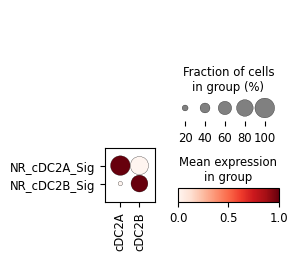

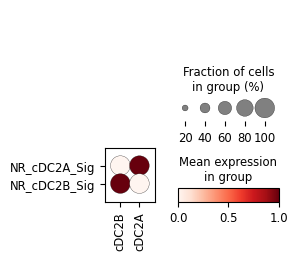

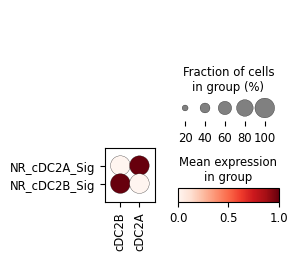

In [49]:
sc.pl.dotplot(data_DC2, colour_vars, groupby="NR_cDC2AB", standard_scale="var", swap_axes=True)
sc.pl.dotplot(data_Brown_AB, colour_vars, groupby="NR_cDC2AB", standard_scale="var", swap_axes=True)
sc.pl.dotplot(data_Minutti_AB, colour_vars, groupby="NR_cDC2AB", standard_scale="var", swap_axes=True)

# Calculate average enrichment for each gene per cell type/dataset

In [5]:
# define deg lists (only kept genes present in all 3 datasets)
NR_cDC2A_Sig = ['S100B','LTB','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2',
    'CLNK','SMCO4','HPGDS','GPR82','TUBA1B','PSMB9','CA2','GNGT2','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3',
    'PDGFRB','CEACAM3','PAK1','PPM1J','CD207','PARM1','CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3',
    'SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1',
    'KALRN','SFTPD','NKG7','LBH','ACOX1','CDH17','ITGB7','HIP1','NRN1','CYSLTR1','RGS19','DAPK2',
    'PSTPIP2','OCIAD2','SNAP29','PREX2','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3','PAWR','MYO1D']


NR_cDC2B_Sig = ['PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','SAT1','EMP3','GADD45B',
    'AHNAK','CXCR4','FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','NFE2L2','NAMPT','CST3','TNFAIP3','TNFRSF1B',
    'PTPRE','AP1S2','CDKN1A','RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1',
    'IL1B','CSTA','AKAP13','NPC2','HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','MXD1','PLXDC2',
    'RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2','HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','KLF4','VEGFA','CAPN2',
    'FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

In [19]:
NR_AB_Sigs_present = ['S100B','LTB','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2',
    'CLNK','SMCO4','HPGDS','GPR82','TUBA1B','PSMB9','CA2','GNGT2','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3',
    'PDGFRB','CEACAM3','PAK1','PPM1J','CD207','PARM1','CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3',
    'SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1',
    'KALRN','SFTPD','NKG7','LBH','ACOX1','CDH17','ITGB7','HIP1','NRN1','CYSLTR1','RGS19','DAPK2',
    'PSTPIP2','OCIAD2','SNAP29','PREX2','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3','PAWR','MYO1D',
    'PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','SAT1','EMP3','GADD45B',
    'AHNAK','CXCR4','FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','NFE2L2','NAMPT','CST3','TNFAIP3','TNFRSF1B',
    'PTPRE','AP1S2','CDKN1A','RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1',
    'IL1B','CSTA','AKAP13','NPC2','HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','MXD1','PLXDC2',
    'RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2','HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','KLF4','VEGFA','CAPN2',
    'FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

## Plotting normalised data (data normalised only across the 4 groups) - not using
* not ideal as forces contrast where there isn't any

In [20]:
#Atlas

# Extract raw expression values as a DataFrame
expr_df_Atlas = data_DC2.raw.to_adata().to_df()[NR_AB_Sigs_present]
# Add metadata column 
expr_df_Atlas["NR_cDC2AB"] = data_DC2.obs["NR_cDC2AB"].values
# Group by cell type 
avg_df_Atlas = expr_df_Atlas.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Atlas["dataset"] = "Atlas"


/scratch/temp/14959507/ipykernel_2529343/2644964660.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Atlas = expr_df_Atlas.groupby("NR_cDC2AB").mean()


In [21]:
# Brown

# Extract raw expression values as a DataFrame
expr_df_Brown = data_Brown_AB.raw.to_adata().to_df()[NR_AB_Sigs_present]
# Add metadata column 
expr_df_Brown["NR_cDC2AB"] = data_Brown_AB.obs["NR_cDC2AB"].values
# Group by cell type 
avg_df_Brown = expr_df_Brown.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Brown["dataset"] = "Brown"

/scratch/temp/14959507/ipykernel_2529343/3111445732.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Brown = expr_df_Brown.groupby("NR_cDC2AB").mean()


In [22]:
# Minutti

# Extract raw expression values as a DataFrame
expr_df_Minutti = data_Minutti_AB.raw.to_adata().to_df()[NR_AB_Sigs_present]
# Add metadata column 
expr_df_Minutti["NR_cDC2AB"] = data_Minutti_AB.obs["NR_cDC2AB"].values
# Group by cell type 
avg_df_Minutti = expr_df_Minutti.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Minutti["dataset"] = "Minutti"

/scratch/temp/14959507/ipykernel_2529343/819630067.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Minutti = expr_df_Minutti.groupby("NR_cDC2AB").mean()


In [23]:
avg_df_Atlas.head()

S100B       LTB      PKIB       GSN      LST1  HLA-DQB2  \
NR_cDC2AB                                                               
cDC2A      2.886375  2.064534  1.583456  2.028554  2.285474  1.419855   
cDC2B      0.475852  0.532835  0.876423  1.413480  1.847675  0.453712   

              ACTG1      AIF1   IL22RA2      ACTB  ...      KLF4     VEGFA  \
NR_cDC2AB                                          ...                       
cDC2A      3.207879  2.506585  0.547479  4.772096  ...  0.445329  0.108944   
cDC2B      2.819199  2.100691  0.019351  4.334780  ...  0.902213  0.557193   

              CAPN2      FPR3      OLR1    PPP1CB    IL10RA    RNF149  \
NR_cDC2AB                                                               
cDC2A      0.090244  0.112646  0.047976  0.382913  0.193452  0.347990   
cDC2B      0.382562  0.447419  0.503006  0.770132  0.517603  0.706468   

               PIM3  dataset  
NR_cDC2AB                     
cDC2A      0.295332    Atlas  
cDC2B      0.703575    Atlas  

[2 rows x 180 columns]

In [24]:
combined_df = pd.concat([avg_df_Atlas, avg_df_Brown, avg_df_Minutti], axis=0)

In [25]:
combined_df = combined_df.reset_index()

In [26]:
combined_df["celltype_dataset"] = combined_df["NR_cDC2AB"].astype(str) + "_" + combined_df["dataset"].astype(str)

In [27]:
combined_df

NR_cDC2AB     S100B       LTB      PKIB       GSN      LST1  HLA-DQB2  \
0     cDC2A  2.886375  2.064534  1.583456  2.028554  2.285474  1.419855   
1     cDC2B  0.475852  0.532835  0.876423  1.413480  1.847675  0.453712   
2     cDC2B  0.184004  0.912429  0.480074  0.541380  2.663872  0.156455   
3     cDC2A  0.201857  3.176672  0.585846  0.914976  3.121590  0.186592   
4     cDC2B  0.000450  0.089824  0.478012  0.797491  0.779564  1.954049   
5     cDC2A  0.000000  1.925378  0.716954  1.162700  1.287515  3.817802   

      ACTG1      AIF1   IL22RA2  ...     VEGFA     CAPN2      FPR3      OLR1  \
0  3.207879  2.506585  0.547479  ...  0.108944  0.090244  0.112646  0.047976   
1  2.819199  2.100691  0.019351  ...  0.557193  0.382562  0.447419  0.503006   
2  2.689801  2.456772  0.006659  ...  0.010339  0.219852  0.076081  0.012031   
3  2.832350  2.085177  0.428787  ...  0.000905  0.041427  0.007193  0.000854   
4  3.491780  0.489890  0.000000  ...  0.034341  0.223445  0.001241  0.006082   
5  2.900875  0.107046  0.000000  ...  0.174665  0.069695  0.002143  0.002098   

     PPP1CB    IL10RA    RNF149      PIM3  dataset  celltype_dataset  
0  0.382913  0.193452  0.347990  0.295332    Atlas       cDC2A_Atlas  
1  0.770132  0.517603  0.706468  0.703575    Atlas       cDC2B_Atlas  
2  0.445250  0.669743  0.336738  0.239204    Brown       cDC2B_Brown  
3  0.341467  0.568081  0.279576  0.261232    Brown       cDC2A_Brown  
4  0.373899  0.488581  0.399453  0.120203  Minutti     cDC2B_Minutti  
5  0.392446  0.323013  0.692627  0.312853  Minutti     cDC2A_Minutti  

[6 rows x 182 columns]

### Plot heatmap:

In [28]:
# Select expression columns only
expr_cols = [col for col in combined_df.columns if col not in ["NR_cDC2AB", "dataset", "celltype_dataset"]]

In [29]:
# Set index to 'celltype_dataset' for plotting
heatmap_data = combined_df.set_index("celltype_dataset")[expr_cols]

In [30]:
custom_order = [
    "cDC2A_Atlas",
    "cDC2A_Brown",
    "cDC2A_Minutti",
    "cDC2B_Atlas",
    "cDC2B_Brown",
    "cDC2B_Minutti"
]

In [31]:
heatmap_data = heatmap_data.loc[custom_order]

In [32]:
heatmap_data

S100B       LTB      PKIB       GSN      LST1  HLA-DQB2  \
celltype_dataset                                                               
cDC2A_Atlas       2.886375  2.064534  1.583456  2.028554  2.285474  1.419855   
cDC2A_Brown       0.201857  3.176672  0.585846  0.914976  3.121590  0.186592   
cDC2A_Minutti     0.000000  1.925378  0.716954  1.162700  1.287515  3.817802   
cDC2B_Atlas       0.475852  0.532835  0.876423  1.413480  1.847675  0.453712   
cDC2B_Brown       0.184004  0.912429  0.480074  0.541380  2.663872  0.156455   
cDC2B_Minutti     0.000450  0.089824  0.478012  0.797491  0.779564  1.954049   

                     ACTG1      AIF1   IL22RA2      ACTB  ...      RGS2  \
celltype_dataset                                          ...             
cDC2A_Atlas       3.207879  2.506585  0.547479  4.772096  ...  0.694618   
cDC2A_Brown       2.832350  2.085177  0.428787  4.340510  ...  1.922814   
cDC2A_Minutti     2.900875  0.107046  0.000000  4.642903  ...  1.939013   
cDC2B_Atlas       2.819199  2.100691  0.019351  4.334780  ...  1.273269   
cDC2B_Brown       2.689801  2.456772  0.006659  4.276774  ...  2.000189   
cDC2B_Minutti     3.491780  0.489890  0.000000  4.879079  ...  1.273388   

                      KLF4     VEGFA     CAPN2      FPR3      OLR1    PPP1CB  \
celltype_dataset                                                               
cDC2A_Atlas       0.445329  0.108944  0.090244  0.112646  0.047976  0.382913   
cDC2A_Brown       0.716164  0.000905  0.041427  0.007193  0.000854  0.341467   
cDC2A_Minutti     0.665647  0.174665  0.069695  0.002143  0.002098  0.392446   
cDC2B_Atlas       0.902213  0.557193  0.382562  0.447419  0.503006  0.770132   
cDC2B_Brown       0.508805  0.010339  0.219852  0.076081  0.012031  0.445250   
cDC2B_Minutti     1.525733  0.034341  0.223445  0.001241  0.006082  0.373899   

                    IL10RA    RNF149      PIM3  
celltype_dataset                                
cDC2A_Atlas       0.193452  0.347990  0.295332  
cDC2A_Brown       0.568081  0.279576  0.261232  
cDC2A_Minutti     0.323013  0.692627  0.312853  
cDC2B_Atlas       0.517603  0.706468  0.703575  
cDC2B_Brown       0.669743  0.336738  0.239204  
cDC2B_Minutti     0.488581  0.399453  0.120203  

[6 rows x 179 columns]

In [33]:
# normalise (z-score) across rows (per gene)
heatmap_data_zscored = heatmap_data.apply(zscore, axis=0)

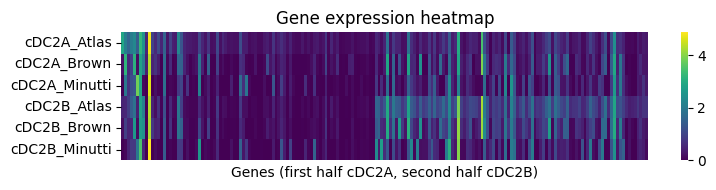

In [34]:
plt.figure(figsize=(8, 2))
sns.heatmap(heatmap_data, cmap="viridis", annot=False)
plt.title("Gene expression heatmap")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

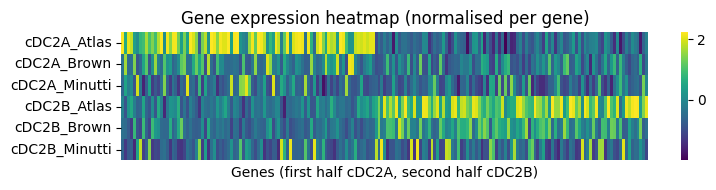

In [35]:
plt.figure(figsize=(8, 2))
sns.heatmap(heatmap_data_zscored, cmap="viridis", annot=False)
plt.title("Gene expression heatmap (normalised per gene)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

## Normalise first across all cells before averaging by cell type - not using

In [36]:
#Atlas

# Extract raw expression values as a DataFrame
expr_df_Atlas = data_DC2.raw.to_adata().to_df()[NR_AB_Sigs_present]
expr_df_Atlas_z = expr_df_Atlas.apply(zscore, axis=0) #normalise (z score) per gene
# Add metadata column 
expr_df_Atlas_z["NR_cDC2AB"] = data_DC2.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Atlas = expr_df_Atlas_z.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Atlas["dataset"] = "Atlas"


/scratch/temp/14959507/ipykernel_2529343/4114947899.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Atlas = expr_df_Atlas_z.groupby("NR_cDC2AB").mean()


In [37]:
# Brown

# Extract raw expression values as a DataFrame
expr_df_Brown = data_Brown_AB.raw.to_adata().to_df()[NR_AB_Sigs_present]
expr_df_Brown_z = expr_df_Brown.apply(zscore, axis=0) #normalise (z score) per gene
# Add metadata column 
expr_df_Brown_z["NR_cDC2AB"] = data_Brown_AB.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Brown = expr_df_Brown_z.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Brown["dataset"] = "Brown"

/scratch/temp/14959507/ipykernel_2529343/1970909090.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Brown = expr_df_Brown_z.groupby("NR_cDC2AB").mean()


In [38]:
# Minutti

# Extract raw expression values as a DataFrame
expr_df_Minutti = data_Minutti_AB.raw.to_adata().to_df()[NR_AB_Sigs_present]
expr_df_Minutti_z = expr_df_Minutti.apply(zscore, axis=0) #normalise (z score) per gene
# Add metadata column 
expr_df_Minutti_z["NR_cDC2AB"] = data_Minutti_AB.obs["NR_cDC2AB"].values
# Group by cell type 
avg_df_Minutti = expr_df_Minutti_z.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Minutti["dataset"] = "Minutti"

/scratch/temp/14959507/ipykernel_2529343/3909904197.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Minutti = expr_df_Minutti_z.groupby("NR_cDC2AB").mean()


In [39]:
#combine
combined_df = pd.concat([avg_df_Atlas, avg_df_Brown, avg_df_Minutti], axis=0).reset_index()

In [41]:
combined_df["celltype_dataset"] = combined_df["NR_cDC2AB"].astype(str) + "_" + combined_df["dataset"].astype(str)

In [42]:
combined_df

NR_cDC2AB     S100B       LTB      PKIB       GSN      LST1  HLA-DQB2  \
0     cDC2A  1.859270  1.451345  0.723279  0.579300  0.456642  0.980732   
1     cDC2B -0.150331 -0.117348 -0.058480 -0.046839 -0.036922 -0.079297   
2     cDC2B -0.013954 -0.510420 -0.056154 -0.184055 -0.348677 -0.025550   
3     cDC2A  0.031768  1.162033  0.127842  0.419023  0.793804  0.058167   
4     cDC2B  0.004694 -0.381042 -0.066558 -0.093919 -0.109593 -0.194198   
5     cDC2A -0.024566  1.994026  0.348303  0.491484  0.573510  1.016255   

      ACTG1      AIF1   IL22RA2  ...     VEGFA     CAPN2      FPR3      OLR1  \
0  0.390595  0.407114  1.467170  ... -0.531216 -0.505845 -0.502746 -0.533704   
1 -0.031581 -0.032917 -0.118628  ...  0.042951  0.040900  0.040649  0.043152   
2 -0.102522  0.206919 -0.292604  ...  0.036864  0.153769  0.103952  0.042814   
3  0.233402 -0.471076  0.666149  ... -0.083925 -0.350073 -0.236660 -0.097471   
4  0.178019  0.109265       NaN  ... -0.089745  0.065698 -0.004317  0.008161   
5 -0.931590 -0.571792       NaN  ...  0.469641 -0.343806  0.022591 -0.042706   

     PPP1CB    IL10RA    RNF149      PIM3  dataset  celltype_dataset  
0 -0.481359 -0.487707 -0.475341 -0.487506    Atlas       cDC2A_Atlas  
1  0.038920  0.039433  0.038434  0.039417    Atlas       cDC2B_Atlas  
2  0.065562  0.056687  0.039824 -0.015986    Brown       cDC2B_Brown  
3 -0.149260 -0.129056 -0.090665  0.036394    Brown       cDC2A_Brown  
4 -0.006285  0.049278 -0.087871 -0.083953  Minutti     cDC2B_Minutti  
5  0.032888 -0.257878  0.459838  0.439333  Minutti     cDC2A_Minutti  

[6 rows x 182 columns]

### Plot heatmap:

In [43]:
# Select expression columns only
expr_cols = [col for col in combined_df.columns if col not in ["NR_cDC2AB", "dataset", "celltype_dataset"]]

In [44]:
# Set index to 'celltype_dataset' for plotting
heatmap_data = combined_df.set_index("celltype_dataset")[expr_cols]

In [45]:
custom_order = [
    "cDC2A_Atlas",
    "cDC2A_Brown",
    "cDC2A_Minutti",
    "cDC2B_Atlas",
    "cDC2B_Brown",
    "cDC2B_Minutti"
]

In [46]:
heatmap_data = heatmap_data.loc[custom_order]

In [47]:
heatmap_data

S100B       LTB      PKIB       GSN      LST1  HLA-DQB2  \
celltype_dataset                                                               
cDC2A_Atlas       1.859270  1.451345  0.723279  0.579300  0.456642  0.980732   
cDC2A_Brown       0.031768  1.162033  0.127842  0.419023  0.793804  0.058167   
cDC2A_Minutti    -0.024566  1.994026  0.348303  0.491484  0.573510  1.016255   
cDC2B_Atlas      -0.150331 -0.117348 -0.058480 -0.046839 -0.036922 -0.079297   
cDC2B_Brown      -0.013954 -0.510420 -0.056154 -0.184055 -0.348677 -0.025550   
cDC2B_Minutti     0.004694 -0.381042 -0.066558 -0.093919 -0.109593 -0.194198   

                     ACTG1      AIF1   IL22RA2      ACTB  ...      RGS2  \
celltype_dataset                                          ...             
cDC2A_Atlas       0.390595  0.407114  1.467170  0.426058  ... -0.500171   
cDC2A_Brown       0.233402 -0.471076  0.666149  0.118813  ... -0.068246   
cDC2A_Minutti    -0.931590 -0.571792       NaN -0.544445  ...  0.745021   
cDC2B_Atlas      -0.031581 -0.032917 -0.118628 -0.034449  ...  0.040441   
cDC2B_Brown      -0.102522  0.206919 -0.292604 -0.052188  ...  0.029977   
cDC2B_Minutti     0.178019  0.109265       NaN  0.104039  ... -0.142367   

                      KLF4     VEGFA     CAPN2      FPR3      OLR1    PPP1CB  \
celltype_dataset                                                               
cDC2A_Atlas      -0.493913 -0.531216 -0.505845 -0.502746 -0.533704 -0.481359   
cDC2A_Brown       0.235027 -0.083925 -0.350073 -0.236660 -0.097471 -0.149260   
cDC2A_Minutti    -0.860946  0.469641 -0.343806  0.022591 -0.042706  0.032888   
cDC2B_Atlas       0.039935  0.042951  0.040900  0.040649  0.043152  0.038920   
cDC2B_Brown      -0.103235  0.036864  0.153769  0.103952  0.042814  0.065562   
cDC2B_Minutti     0.164520 -0.089745  0.065698 -0.004317  0.008161 -0.006285   

                    IL10RA    RNF149      PIM3  
celltype_dataset                                
cDC2A_Atlas      -0.487707 -0.475341 -0.487506  
cDC2A_Brown      -0.129056 -0.090665  0.036394  
cDC2A_Minutti    -0.257878  0.459838  0.439333  
cDC2B_Atlas       0.039433  0.038434  0.039417  
cDC2B_Brown       0.056687  0.039824 -0.015986  
cDC2B_Minutti     0.049278 -0.087871 -0.083953  

[6 rows x 179 columns]

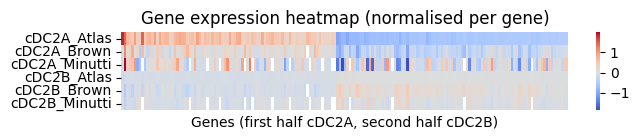

In [48]:
plt.figure(figsize=(7, 1.5))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

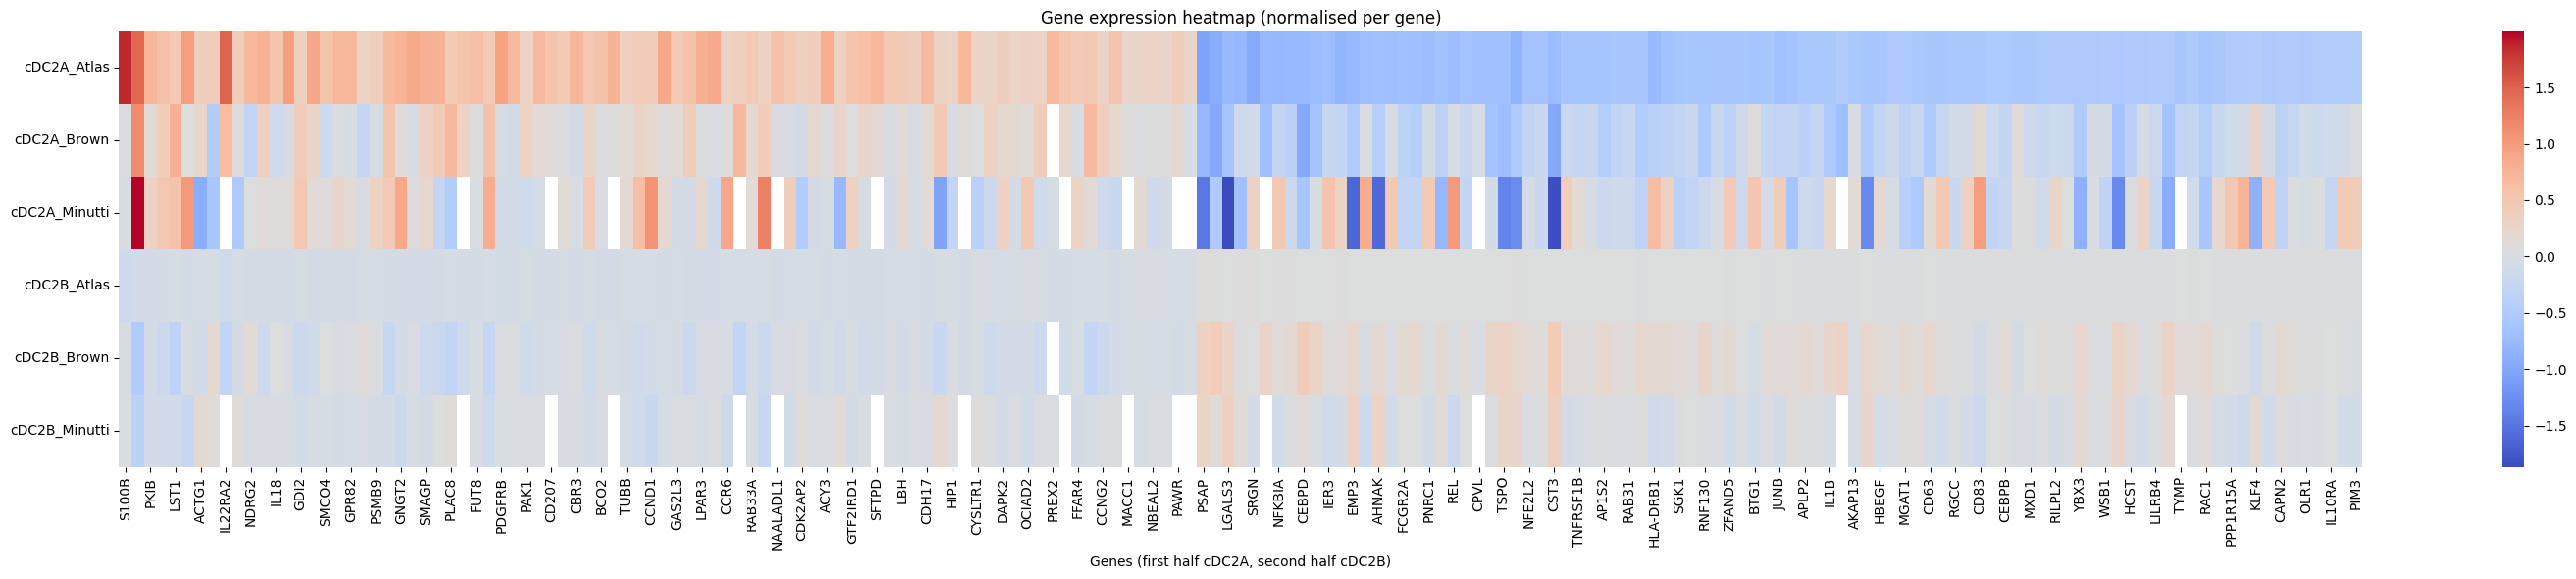

In [49]:
plt.figure(figsize=(30, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.tight_layout()
plt.show()

### Do min-max after normalisation z score
* min-max scaled per gene across the four groups (after z score done on all cells) to highlight relative expression differences
* z score alone was flattening out to zero (std deviation was very small), this retains rank for each gene

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

heatmap_data_scaled = pd.DataFrame(
    scaler.fit_transform(heatmap_data.T).T,  # scale per gene
    index=heatmap_data.index,
    columns=heatmap_data.columns
)

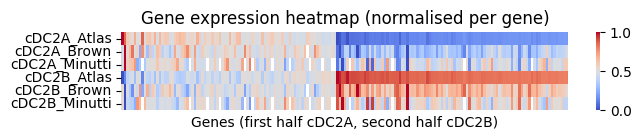

In [51]:
plt.figure(figsize=(7, 1.5))
sns.heatmap(heatmap_data_scaled, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

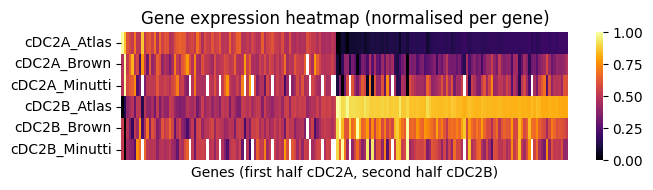

In [53]:
plt.figure(figsize=(7, 2))
sns.heatmap(heatmap_data_scaled, cmap="inferno", annot=False)
plt.title("Gene expression heatmap (normalised per gene)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

# Only plot Brown (remove Minutti from heatmap):

## Z score across 4 rows - not ideal as forcing contrast between groups

In [54]:
# define gene list (top 100 degs for cDC2A and cDC2B from our atlas, excluded 'C15orf48' and 'C12orf75' as not in Brown
NR_cDC2A_Sig = ['S100B','LTB','CD1A','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2','CLNK','SMCO4','HPGDS','GPR82','TUBA1B','PSMB9','C15orf48','CA2','GNGT2','GNAO1','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3','PDGFRB','FCGBP','PTMS','CEACAM3','PAK1','PPM1J','CD207','PARM1','CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3','CD1E','SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','STK17A','NOTCH4','NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1','TLR10','KALRN','SFTPD','NKG7','LBH','ACOX1','MTRNR2L12','CDH17','KCNK17','ITGB7','HIP1','NRN1','MTRNR2L8','CYSLTR1','RGS19','ARHGEF35','DAPK2','PSTPIP2','OCIAD2','SNAP29','PREX2','C12orf75','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3','PAWR','MYO1D']
NR_cDC2B_Sig = ['LYZ','PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','NEAT1','SAT1','EMP3','GADD45B','AHNAK','CXCR4','FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','FTH1','NFE2L2','NAMPT','MALAT1','CST3','TNFAIP3','TNFRSF1B','PTPRE','AP1S2','CDKN1A','RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1','IL1B','CSTA','AKAP13','NPC2','CD99','HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','LRRFIP1','MXD1','PLXDC2','RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2','HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','GNAQ','KLF4','VEGFA','CAPN2','FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

NR_AB_Combined = ['S100B','LTB','CD1A','PKIB','GSN','LST1','HLA-DQB2','ACTG1','AIF1','IL22RA2','ACTB','NDRG2','SUSD3','IL18','TACSTD2','GDI2','CLNK','SMCO4','HPGDS','GPR82','TUBA1B',
                  'PSMB9','CA2','GNGT2','GNAO1','PPM1N','SMAGP','PIK3R6','PLAC8','KCNMB1','FUT8','ABI3','PDGFRB','FCGBP','PTMS','CEACAM3','PAK1','PPM1J','CD207','PARM1',
                  'CBR3','CYFIP2','BCO2','MYL9','TUBB','SIGLEC10','CCND1','ANKRD55','GAS2L3','CD1E','SH3YL1','LPAR3','SMPDL3B','CCR6','IDO1','RAB33A','RUNX3','STK17A','NOTCH4',
                  'NAALADL1','NME4','CDK2AP2','DCTPP1','ACY3','SCPEP1','GTF2IRD1','TLR10','KALRN','SFTPD','NKG7','LBH','ACOX1','MTRNR2L12','CDH17','KCNK17','ITGB7','HIP1','NRN1',
                  'MTRNR2L8','CYSLTR1','RGS19','ARHGEF35','DAPK2','PSTPIP2','OCIAD2','SNAP29','PREX2','SYT2','FFAR4','CD3E','CCNG2','LSR','MACC1','PRKAR2B','NBEAL2','GAB3',
                  'PAWR','MYO1D', 
                  'LYZ','PSAP','CLEC10A','LGALS3','CD44','SRGN','SERPINA1','NFKBIA','PLAUR','CEBPD','TNFSF13B','IER3','NEAT1','SAT1','EMP3','GADD45B','AHNAK','CXCR4',
                  'FCGR2A','FCGR2B','PNRC1','ZEB2','REL','SOD2','CPVL','TIMP1','TSPO','FCER1G','FTH1','NFE2L2','NAMPT','MALAT1','CST3','TNFAIP3','TNFRSF1B','PTPRE','AP1S2','CDKN1A',
                  'RAB31','TGFBI','HLA-DRB1','ZFP36','SGK1','RUNX1','RNF130','ETS2','ZFAND5','STX11','BTG1','AOAH','JUNB','MCL1','APLP2','INSIG1','IL1B','CSTA','AKAP13','NPC2','CD99',
                  'HBEGF','MS4A7','MGAT1','RNH1','CD63','DUSP1','RGCC','GPR183','CD83','ATP1B3','CEBPB','KLF6','LRRFIP1','MXD1','PLXDC2','RILPL2','CXCL16','YBX3','GK','WSB1','ANXA2',
                  'HCST','CREM','LILRB4','MNDA','TYMP','MRC1','RAC1','EIF1','PPP1R15A','RGS2','GNAQ','KLF4','VEGFA','CAPN2','FPR3','OLR1','PPP1CB','IL10RA','RNF149','PIM3']

In [83]:
#Atlas

# Extract raw expression values as a DataFrame
expr_df_Atlas = data_DC2.raw.to_adata().to_df()[NR_AB_Combined]
# Add metadata column 
expr_df_Atlas["NR_cDC2AB"] = data_DC2.obs["NR_cDC2AB"].values
# Group by cell type 
avg_df_Atlas = expr_df_Atlas.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Atlas["dataset"] = "Atlas"


/scratch/temp/14959507/ipykernel_2529343/165212313.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Atlas = expr_df_Atlas.groupby("NR_cDC2AB").mean()


In [84]:
# Brown

# Extract raw expression values as a DataFrame
expr_df_Brown = data_Brown_AB.raw.to_adata().to_df()[NR_AB_Combined]
# Add metadata column 
expr_df_Brown["NR_cDC2AB"] = data_Brown_AB.obs["NR_cDC2AB"].values
# Group by cell type 
avg_df_Brown = expr_df_Brown.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Brown["dataset"] = "Brown"

/scratch/temp/14959507/ipykernel_2529343/1503668607.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Brown = expr_df_Brown.groupby("NR_cDC2AB").mean()


In [85]:
avg_df_Atlas.head()

S100B       LTB      CD1A      PKIB       GSN      LST1  \
NR_cDC2AB                                                               
cDC2A      2.886375  2.064534  1.274075  1.583456  2.028554  2.285474   
cDC2B      0.475852  0.532835  0.253128  0.876423  1.413480  1.847675   

           HLA-DQB2     ACTG1      AIF1   IL22RA2  ...      KLF4     VEGFA  \
NR_cDC2AB                                          ...                       
cDC2A      1.419855  3.207879  2.506585  0.547479  ...  0.445329  0.108944   
cDC2B      0.453712  2.819199  2.100691  0.019351  ...  0.902213  0.557193   

              CAPN2      FPR3      OLR1    PPP1CB    IL10RA    RNF149  \
NR_cDC2AB                                                               
cDC2A      0.090244  0.112646  0.047976  0.382913  0.193452  0.347990   
cDC2B      0.382562  0.447419  0.503006  0.770132  0.517603  0.706468   

               PIM3  dataset  
NR_cDC2AB                     
cDC2A      0.295332    Atlas  
cDC2B      0.703575    Atlas  

[2 rows x 199 columns]

In [86]:
combined_df = pd.concat([avg_df_Atlas, avg_df_Brown], axis=0)

In [87]:
combined_df = combined_df.reset_index()

In [88]:
combined_df["celltype_dataset"] = combined_df["NR_cDC2AB"].astype(str) + "_" + combined_df["dataset"].astype(str)

In [89]:
combined_df

NR_cDC2AB     S100B       LTB      CD1A      PKIB       GSN      LST1  \
0     cDC2A  2.886375  2.064534  1.274075  1.583456  2.028554  2.285474   
1     cDC2B  0.475852  0.532835  0.253128  0.876423  1.413480  1.847675   
2     cDC2B  0.184004  0.912429  0.022283  0.480074  0.541380  2.663872   
3     cDC2A  0.201857  3.176672  0.016703  0.585846  0.914976  3.121590   

   HLA-DQB2     ACTG1      AIF1  ...     VEGFA     CAPN2      FPR3      OLR1  \
0  1.419855  3.207879  2.506585  ...  0.108944  0.090244  0.112646  0.047976   
1  0.453712  2.819199  2.100691  ...  0.557193  0.382562  0.447419  0.503006   
2  0.156455  2.689801  2.456772  ...  0.010339  0.219852  0.076081  0.012031   
3  0.186592  2.832350  2.085177  ...  0.000905  0.041427  0.007193  0.000854   

     PPP1CB    IL10RA    RNF149      PIM3  dataset  celltype_dataset  
0  0.382913  0.193452  0.347990  0.295332    Atlas       cDC2A_Atlas  
1  0.770132  0.517603  0.706468  0.703575    Atlas       cDC2B_Atlas  
2  0.445250  0.669743  0.336738  0.239204    Brown       cDC2B_Brown  
3  0.341467  0.568081  0.279576  0.261232    Brown       cDC2A_Brown  

[4 rows x 201 columns]

### Plot heatmap:

In [90]:
# Select expression columns only
expr_cols = [col for col in combined_df.columns if col not in ["NR_cDC2AB", "dataset", "celltype_dataset"]]

In [91]:
# Set index to 'celltype_dataset' for plotting
heatmap_data = combined_df.set_index("celltype_dataset")[expr_cols]

In [92]:
custom_order = [
    "cDC2A_Atlas",
    "cDC2A_Brown",
    "cDC2B_Atlas",
    "cDC2B_Brown"
]

In [93]:
heatmap_data = heatmap_data.loc[custom_order]

In [94]:
heatmap_data

S100B       LTB      CD1A      PKIB       GSN      LST1  \
celltype_dataset                                                               
cDC2A_Atlas       2.886375  2.064534  1.274075  1.583456  2.028554  2.285474   
cDC2A_Brown       0.201857  3.176672  0.016703  0.585846  0.914976  3.121590   
cDC2B_Atlas       0.475852  0.532835  0.253128  0.876423  1.413480  1.847675   
cDC2B_Brown       0.184004  0.912429  0.022283  0.480074  0.541380  2.663872   

                  HLA-DQB2     ACTG1      AIF1   IL22RA2  ...      GNAQ  \
celltype_dataset                                          ...             
cDC2A_Atlas       1.419855  3.207879  2.506585  0.547479  ...  0.252307   
cDC2A_Brown       0.186592  2.832350  2.085177  0.428787  ...  0.202493   
cDC2B_Atlas       0.453712  2.819199  2.100691  0.019351  ...  0.609070   
cDC2B_Brown       0.156455  2.689801  2.456772  0.006659  ...  0.291228   

                      KLF4     VEGFA     CAPN2      FPR3      OLR1    PPP1CB  \
celltype_dataset                                                               
cDC2A_Atlas       0.445329  0.108944  0.090244  0.112646  0.047976  0.382913   
cDC2A_Brown       0.716164  0.000905  0.041427  0.007193  0.000854  0.341467   
cDC2B_Atlas       0.902213  0.557193  0.382562  0.447419  0.503006  0.770132   
cDC2B_Brown       0.508805  0.010339  0.219852  0.076081  0.012031  0.445250   

                    IL10RA    RNF149      PIM3  
celltype_dataset                                
cDC2A_Atlas       0.193452  0.347990  0.295332  
cDC2A_Brown       0.568081  0.279576  0.261232  
cDC2B_Atlas       0.517603  0.706468  0.703575  
cDC2B_Brown       0.669743  0.336738  0.239204  

[4 rows x 198 columns]

In [95]:
# normalise (z-score) across rows (per gene)
heatmap_data_zscored = heatmap_data.apply(zscore, axis=0)

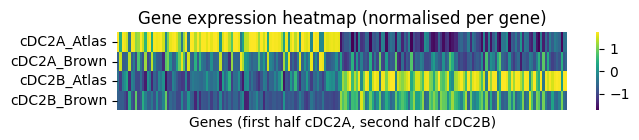

In [96]:
plt.figure(figsize=(7, 1.5))
sns.heatmap(heatmap_data_zscored, cmap="viridis", annot=False)
plt.title("Gene expression heatmap (normalised per gene)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

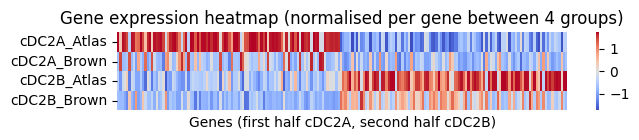

In [ ]:
plt.figure(figsize=(7, 1.5))
sns.heatmap(heatmap_data_zscored, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene between 4 groups)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.savefig("heatmap_Atlas_v_Brown_.pdf", format="pdf")
plt.show()

## Normalise first across all cells before averaging by cell type

In [108]:
#Atlas

# Extract raw expression values as a DataFrame
expr_df_Atlas = data_DC2.raw.to_adata().to_df()[NR_AB_Combined]
expr_df_Atlas_z = expr_df_Atlas.apply(zscore, axis=0) #normalise (z score) per gene
# Add metadata column 
expr_df_Atlas_z["NR_cDC2AB"] = data_DC2.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Atlas = expr_df_Atlas_z.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Atlas["dataset"] = "Atlas"


/scratch/temp/14959507/ipykernel_2529343/900059460.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Atlas = expr_df_Atlas_z.groupby("NR_cDC2AB").mean()


In [109]:
# Brown

# Extract raw expression values as a DataFrame
expr_df_Brown = data_Brown_AB.raw.to_adata().to_df()[NR_AB_Combined]
expr_df_Brown_z = expr_df_Brown.apply(zscore, axis=0) #normalise (z score) per gene
# Add metadata column 
expr_df_Brown_z["NR_cDC2AB"] = data_Brown_AB.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Brown = expr_df_Brown_z.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Brown["dataset"] = "Brown"

/scratch/temp/14959507/ipykernel_2529343/1346692175.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Brown = expr_df_Brown_z.groupby("NR_cDC2AB").mean()


In [110]:
expr_df_Brown.std(axis=0)[expr_df_Brown.std(axis=0) == 0] # these two genes have 0.0 std deviation in Brown data, giving NaN after z scoring

ARHGEF35    0.0
PREX2       0.0
dtype: float64

In [111]:
avg_df_Atlas.head()

S100B       LTB      CD1A      PKIB       GSN      LST1  \
NR_cDC2AB                                                               
cDC2A      1.859270  1.451345  1.295573  0.723279  0.579300  0.456642   
cDC2B     -0.150331 -0.117348 -0.104753 -0.058480 -0.046839 -0.036922   

           HLA-DQB2     ACTG1      AIF1   IL22RA2  ...      KLF4     VEGFA  \
NR_cDC2AB                                          ...                       
cDC2A      0.980732  0.390595  0.407114  1.467170  ... -0.493913 -0.531216   
cDC2B     -0.079297 -0.031581 -0.032917 -0.118628  ...  0.039935  0.042951   

              CAPN2      FPR3      OLR1    PPP1CB    IL10RA    RNF149  \
NR_cDC2AB                                                               
cDC2A     -0.505845 -0.502746 -0.533704 -0.481359 -0.487707 -0.475341   
cDC2B      0.040900  0.040649  0.043152  0.038920  0.039433  0.038434   

               PIM3  dataset  
NR_cDC2AB                     
cDC2A     -0.487506    Atlas  
cDC2B      0.039417    Atlas  

[2 rows x 199 columns]

In [112]:
#combine
combined_df = pd.concat([avg_df_Atlas, avg_df_Brown], axis=0).reset_index()

In [113]:
combined_df.head()

NR_cDC2AB     S100B       LTB      CD1A      PKIB       GSN      LST1  \
0     cDC2A  1.859270  1.451345  1.295573  0.723279  0.579300  0.456642   
1     cDC2B -0.150331 -0.117348 -0.104753 -0.058480 -0.046839 -0.036922   
2     cDC2B -0.013954 -0.510420  0.013611 -0.056154 -0.184055 -0.348677   
3     cDC2A  0.031768  1.162033 -0.030988  0.127842  0.419023  0.793804   

   HLA-DQB2     ACTG1      AIF1  ...      KLF4     VEGFA     CAPN2      FPR3  \
0  0.980732  0.390595  0.407114  ... -0.493913 -0.531216 -0.505845 -0.502746   
1 -0.079297 -0.031581 -0.032917  ...  0.039935  0.042951  0.040900  0.040649   
2 -0.025550 -0.102522  0.206919  ... -0.103235  0.036864  0.153769  0.103952   
3  0.058167  0.233402 -0.471076  ...  0.235027 -0.083925 -0.350073 -0.236660   

       OLR1    PPP1CB    IL10RA    RNF149      PIM3  dataset  
0 -0.533704 -0.481359 -0.487707 -0.475341 -0.487506    Atlas  
1  0.043152  0.038920  0.039433  0.038434  0.039417    Atlas  
2  0.042814  0.065562  0.056687  0.039824 -0.015986    Brown  
3 -0.097471 -0.149260 -0.129056 -0.090665  0.036394    Brown  

[4 rows x 200 columns]

In [114]:
#drop NaN's 
combined_df.columns[combined_df.isna().any()]
combined_df = combined_df.dropna(axis=1)

In [115]:
combined_df.head()

NR_cDC2AB     S100B       LTB      CD1A      PKIB       GSN      LST1  \
0     cDC2A  1.859270  1.451345  1.295573  0.723279  0.579300  0.456642   
1     cDC2B -0.150331 -0.117348 -0.104753 -0.058480 -0.046839 -0.036922   
2     cDC2B -0.013954 -0.510420  0.013611 -0.056154 -0.184055 -0.348677   
3     cDC2A  0.031768  1.162033 -0.030988  0.127842  0.419023  0.793804   

   HLA-DQB2     ACTG1      AIF1  ...      KLF4     VEGFA     CAPN2      FPR3  \
0  0.980732  0.390595  0.407114  ... -0.493913 -0.531216 -0.505845 -0.502746   
1 -0.079297 -0.031581 -0.032917  ...  0.039935  0.042951  0.040900  0.040649   
2 -0.025550 -0.102522  0.206919  ... -0.103235  0.036864  0.153769  0.103952   
3  0.058167  0.233402 -0.471076  ...  0.235027 -0.083925 -0.350073 -0.236660   

       OLR1    PPP1CB    IL10RA    RNF149      PIM3  dataset  
0 -0.533704 -0.481359 -0.487707 -0.475341 -0.487506    Atlas  
1  0.043152  0.038920  0.039433  0.038434  0.039417    Atlas  
2  0.042814  0.065562  0.056687  0.039824 -0.015986    Brown  
3 -0.097471 -0.149260 -0.129056 -0.090665  0.036394    Brown  

[4 rows x 198 columns]

In [116]:
combined_df["celltype_dataset"] = combined_df["NR_cDC2AB"].astype(str) + "_" + combined_df["dataset"].astype(str)

In [117]:
combined_df

NR_cDC2AB     S100B       LTB      CD1A      PKIB       GSN      LST1  \
0     cDC2A  1.859270  1.451345  1.295573  0.723279  0.579300  0.456642   
1     cDC2B -0.150331 -0.117348 -0.104753 -0.058480 -0.046839 -0.036922   
2     cDC2B -0.013954 -0.510420  0.013611 -0.056154 -0.184055 -0.348677   
3     cDC2A  0.031768  1.162033 -0.030988  0.127842  0.419023  0.793804   

   HLA-DQB2     ACTG1      AIF1  ...     VEGFA     CAPN2      FPR3      OLR1  \
0  0.980732  0.390595  0.407114  ... -0.531216 -0.505845 -0.502746 -0.533704   
1 -0.079297 -0.031581 -0.032917  ...  0.042951  0.040900  0.040649  0.043152   
2 -0.025550 -0.102522  0.206919  ...  0.036864  0.153769  0.103952  0.042814   
3  0.058167  0.233402 -0.471076  ... -0.083925 -0.350073 -0.236660 -0.097471   

     PPP1CB    IL10RA    RNF149      PIM3  dataset  celltype_dataset  
0 -0.481359 -0.487707 -0.475341 -0.487506    Atlas       cDC2A_Atlas  
1  0.038920  0.039433  0.038434  0.039417    Atlas       cDC2B_Atlas  
2  0.065562  0.056687  0.039824 -0.015986    Brown       cDC2B_Brown  
3 -0.149260 -0.129056 -0.090665  0.036394    Brown       cDC2A_Brown  

[4 rows x 199 columns]

### Plot heatmap:

In [118]:
# Select expression columns only
expr_cols = [col for col in combined_df.columns if col not in ["NR_cDC2AB", "dataset", "celltype_dataset"]]

In [119]:
# Set index to 'celltype_dataset' for plotting
heatmap_data = combined_df.set_index("celltype_dataset")[expr_cols]

In [120]:
custom_order = [
    "cDC2A_Atlas",
    "cDC2A_Brown",
    "cDC2B_Atlas",
    "cDC2B_Brown"
]

In [121]:
heatmap_data = heatmap_data.loc[custom_order]

In [122]:
heatmap_data

S100B       LTB      CD1A      PKIB       GSN      LST1  \
celltype_dataset                                                               
cDC2A_Atlas       1.859270  1.451345  1.295573  0.723279  0.579300  0.456642   
cDC2A_Brown       0.031768  1.162033 -0.030988  0.127842  0.419023  0.793804   
cDC2B_Atlas      -0.150331 -0.117348 -0.104753 -0.058480 -0.046839 -0.036922   
cDC2B_Brown      -0.013954 -0.510420  0.013611 -0.056154 -0.184055 -0.348677   

                  HLA-DQB2     ACTG1      AIF1   IL22RA2  ...      GNAQ  \
celltype_dataset                                          ...             
cDC2A_Atlas       0.980732  0.390595  0.407114  1.467170  ... -0.497098   
cDC2A_Brown       0.058167  0.233402 -0.471076  0.666149  ... -0.151066   
cDC2B_Atlas      -0.079297 -0.031581 -0.032917 -0.118628  ...  0.040193   
cDC2B_Brown      -0.025550 -0.102522  0.206919 -0.292604  ...  0.066356   

                      KLF4     VEGFA     CAPN2      FPR3      OLR1    PPP1CB  \
celltype_dataset                                                               
cDC2A_Atlas      -0.493913 -0.531216 -0.505845 -0.502746 -0.533704 -0.481359   
cDC2A_Brown       0.235027 -0.083925 -0.350073 -0.236660 -0.097471 -0.149260   
cDC2B_Atlas       0.039935  0.042951  0.040900  0.040649  0.043152  0.038920   
cDC2B_Brown      -0.103235  0.036864  0.153769  0.103952  0.042814  0.065562   

                    IL10RA    RNF149      PIM3  
celltype_dataset                                
cDC2A_Atlas      -0.487707 -0.475341 -0.487506  
cDC2A_Brown      -0.129056 -0.090665  0.036394  
cDC2B_Atlas       0.039433  0.038434  0.039417  
cDC2B_Brown       0.056687  0.039824 -0.015986  

[4 rows x 196 columns]

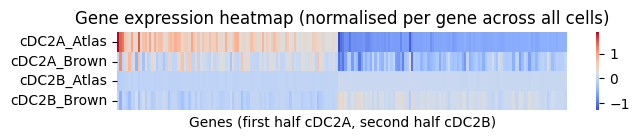

In [124]:
plt.figure(figsize=(7, 1.5))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene across all cells)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

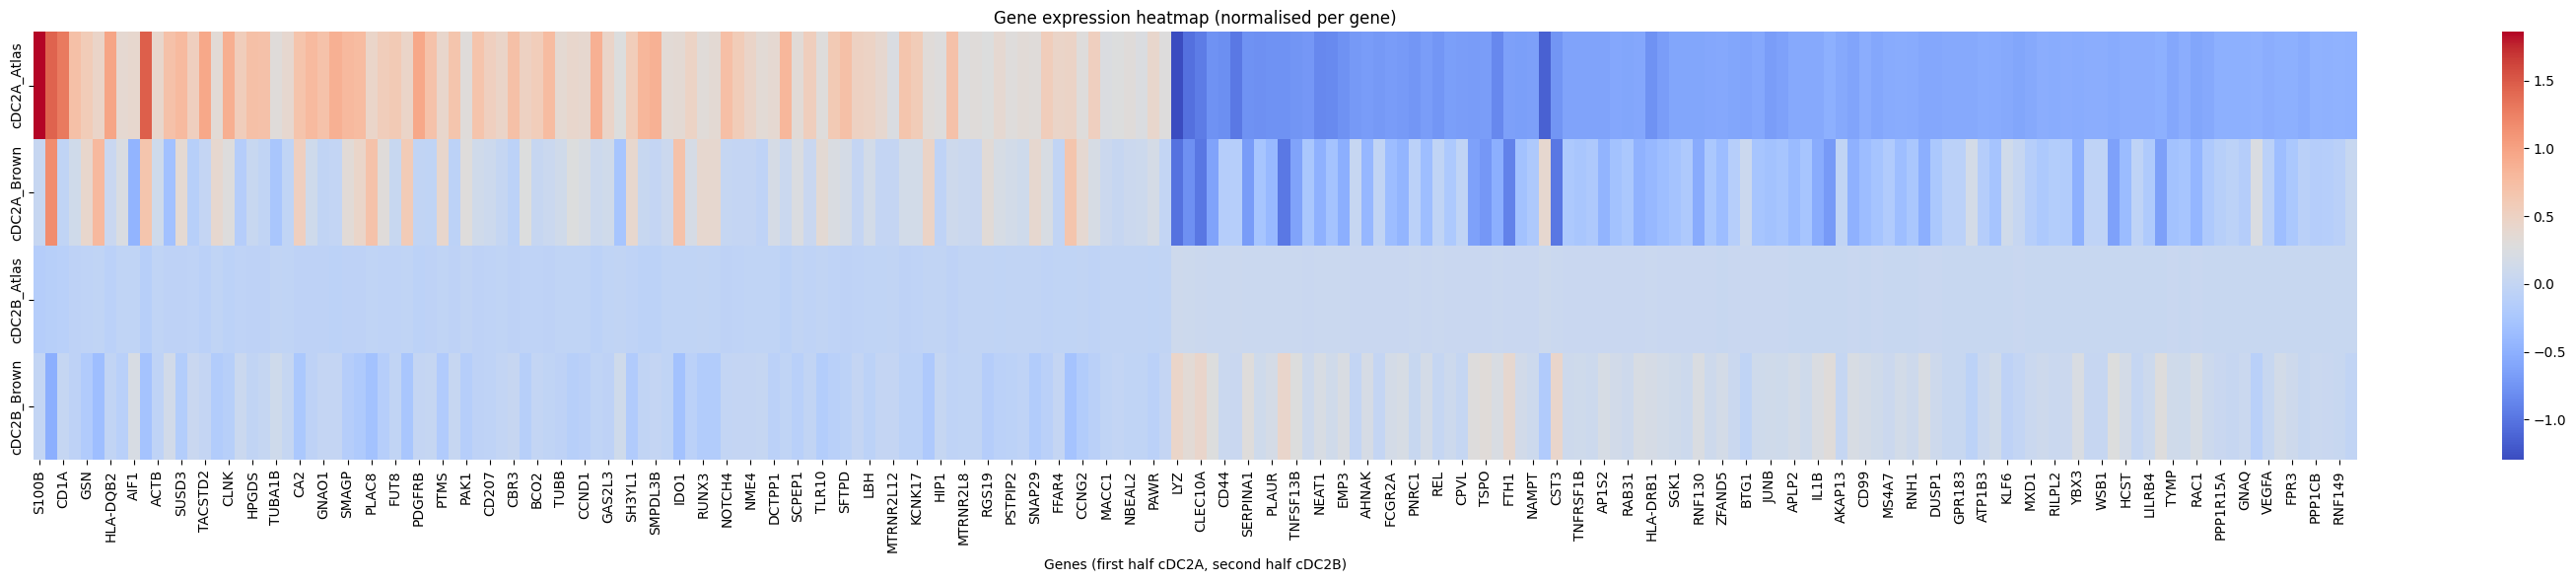

In [73]:
plt.figure(figsize=(30, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.tight_layout()
plt.show()

## Do min-max after normalisation z score
* min-max scaled per gene across the four groups (after z score done on all cells) to highlight relative expression differences
* z score alone was flattening out to zero (std deviation was very small), this retains rank for each gene

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

heatmap_data_scaled = pd.DataFrame(
    scaler.fit_transform(heatmap_data.T).T,  # scale per gene
    index=heatmap_data.index,
    columns=heatmap_data.columns
)

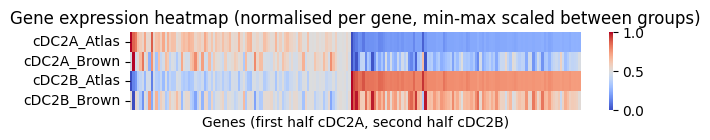

In [80]:
plt.figure(figsize=(7, 1.5))
sns.heatmap(heatmap_data_scaled, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene, min-max scaled between groups)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

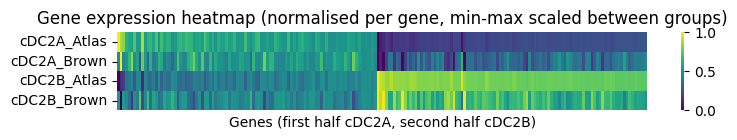

In [ ]:
plt.figure(figsize=(8, 1.5))
sns.heatmap(heatmap_data_scaled, cmap="viridis", annot=False)
plt.title("Gene expression heatmap (normalised per gene, min-max scaled between groups)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
#plt.savefig("heatmap_Atlas_v_Brown.pdf", format="pdf")
plt.show()

# z score between groups

In [125]:
# normalise (z-score) across rows (per gene)
heatmap_data_z = heatmap_data.apply(zscore, axis=0)

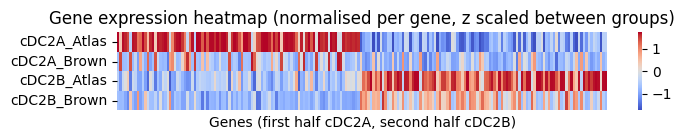

In [130]:
plt.figure(figsize=(7.5, 1.5))
sns.heatmap(heatmap_data_zscored, cmap="coolwarm", annot=False)
plt.title("Gene expression heatmap (normalised per gene, z scaled between groups)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.savefig("heatmap_Atlas_v_Brown_ZZ.pdf", format="pdf")
plt.show()

## Do min-max scaling without normalisation - not ideal 
* as massive range pushes most genes to near zero

In [134]:
#Atlas

# Extract raw expression values as a DataFrame
expr_df_Atlas = data_DC2.raw.to_adata().to_df()[NR_AB_Combined]
# Add metadata column 
expr_df_Atlas["NR_cDC2AB"] = data_DC2.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Atlas = expr_df_Atlas.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Atlas["dataset"] = "Atlas"


/scratch/temp/14958626/ipykernel_2464376/1416843159.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Atlas = expr_df_Atlas.groupby("NR_cDC2AB").mean()


In [135]:
# Brown

# Extract raw expression values as a DataFrame
expr_df_Brown = data_Brown_AB.raw.to_adata().to_df()[NR_AB_Combined]
# Add metadata column 
expr_df_Brown["NR_cDC2AB"] = data_Brown_AB.obs["NR_cDC2AB"].values
# Group/average by cell type 
avg_df_Brown = expr_df_Brown.groupby("NR_cDC2AB").mean()
# add dataset label
avg_df_Brown["dataset"] = "Brown"

/scratch/temp/14958626/ipykernel_2464376/1347278910.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df_Brown = expr_df_Brown.groupby("NR_cDC2AB").mean()


In [136]:
avg_df_Atlas.head()

S100B       LTB      CD1A      PKIB       GSN      LST1  \
NR_cDC2AB                                                               
cDC2A      2.886375  2.064534  1.274075  1.583456  2.028554  2.285474   
cDC2B      0.475852  0.532835  0.253128  0.876423  1.413480  1.847675   

           HLA-DQB2     ACTG1      AIF1   IL22RA2  ...      KLF4     VEGFA  \
NR_cDC2AB                                          ...                       
cDC2A      1.419855  3.207879  2.506585  0.547479  ...  0.445329  0.108944   
cDC2B      0.453712  2.819199  2.100691  0.019351  ...  0.902213  0.557193   

              CAPN2      FPR3      OLR1    PPP1CB    IL10RA    RNF149  \
NR_cDC2AB                                                               
cDC2A      0.090244  0.112646  0.047976  0.382913  0.193452  0.347990   
cDC2B      0.382562  0.447419  0.503006  0.770132  0.517603  0.706468   

               PIM3  dataset  
NR_cDC2AB                     
cDC2A      0.295332    Atlas  
cDC2B      0.703575    Atlas  

[2 rows x 199 columns]

In [137]:
#combine
combined_df = pd.concat([avg_df_Atlas, avg_df_Brown], axis=0).reset_index()

In [138]:
combined_df["celltype_dataset"] = combined_df["NR_cDC2AB"].astype(str) + "_" + combined_df["dataset"].astype(str)

In [139]:
combined_df

NR_cDC2AB     S100B       LTB      CD1A      PKIB       GSN      LST1  \
0     cDC2A  2.886375  2.064534  1.274075  1.583456  2.028554  2.285474   
1     cDC2B  0.475852  0.532835  0.253128  0.876423  1.413480  1.847675   
2     cDC2B  0.184004  0.912429  0.022283  0.480074  0.541380  2.663872   
3     cDC2A  0.201857  3.176672  0.016703  0.585846  0.914976  3.121590   

   HLA-DQB2     ACTG1      AIF1  ...     VEGFA     CAPN2      FPR3      OLR1  \
0  1.419855  3.207879  2.506585  ...  0.108944  0.090244  0.112646  0.047976   
1  0.453712  2.819199  2.100691  ...  0.557193  0.382562  0.447419  0.503006   
2  0.156455  2.689801  2.456772  ...  0.010339  0.219852  0.076081  0.012031   
3  0.186592  2.832350  2.085177  ...  0.000905  0.041427  0.007193  0.000854   

     PPP1CB    IL10RA    RNF149      PIM3  dataset  celltype_dataset  
0  0.382913  0.193452  0.347990  0.295332    Atlas       cDC2A_Atlas  
1  0.770132  0.517603  0.706468  0.703575    Atlas       cDC2B_Atlas  
2  0.445250  0.669743  0.336738  0.239204    Brown       cDC2B_Brown  
3  0.341467  0.568081  0.279576  0.261232    Brown       cDC2A_Brown  

[4 rows x 201 columns]

### Plot heatmap:

In [140]:
# Select expression columns only
expr_cols = [col for col in combined_df.columns if col not in ["NR_cDC2AB", "dataset", "celltype_dataset"]]

In [141]:
# Set index to 'celltype_dataset' for plotting
heatmap_data = combined_df.set_index("celltype_dataset")[expr_cols]

In [142]:
custom_order = [
    "cDC2A_Atlas",
    "cDC2A_Brown",
    "cDC2B_Atlas",
    "cDC2B_Brown"
]

In [143]:
heatmap_data = heatmap_data.loc[custom_order]

In [144]:
heatmap_data

S100B       LTB      CD1A      PKIB       GSN      LST1  \
celltype_dataset                                                               
cDC2A_Atlas       2.886375  2.064534  1.274075  1.583456  2.028554  2.285474   
cDC2A_Brown       0.201857  3.176672  0.016703  0.585846  0.914976  3.121590   
cDC2B_Atlas       0.475852  0.532835  0.253128  0.876423  1.413480  1.847675   
cDC2B_Brown       0.184004  0.912429  0.022283  0.480074  0.541380  2.663872   

                  HLA-DQB2     ACTG1      AIF1   IL22RA2  ...      GNAQ  \
celltype_dataset                                          ...             
cDC2A_Atlas       1.419855  3.207879  2.506585  0.547479  ...  0.252307   
cDC2A_Brown       0.186592  2.832350  2.085177  0.428787  ...  0.202493   
cDC2B_Atlas       0.453712  2.819199  2.100691  0.019351  ...  0.609070   
cDC2B_Brown       0.156455  2.689801  2.456772  0.006659  ...  0.291228   

                      KLF4     VEGFA     CAPN2      FPR3      OLR1    PPP1CB  \
celltype_dataset                                                               
cDC2A_Atlas       0.445329  0.108944  0.090244  0.112646  0.047976  0.382913   
cDC2A_Brown       0.716164  0.000905  0.041427  0.007193  0.000854  0.341467   
cDC2B_Atlas       0.902213  0.557193  0.382562  0.447419  0.503006  0.770132   
cDC2B_Brown       0.508805  0.010339  0.219852  0.076081  0.012031  0.445250   

                    IL10RA    RNF149      PIM3  
celltype_dataset                                
cDC2A_Atlas       0.193452  0.347990  0.295332  
cDC2A_Brown       0.568081  0.279576  0.261232  
cDC2B_Atlas       0.517603  0.706468  0.703575  
cDC2B_Brown       0.669743  0.336738  0.239204  

[4 rows x 198 columns]

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

heatmap_data_scaled = pd.DataFrame(
    scaler.fit_transform(heatmap_data.T).T,  # scale per gene
    index=heatmap_data.index,
    columns=heatmap_data.columns
)

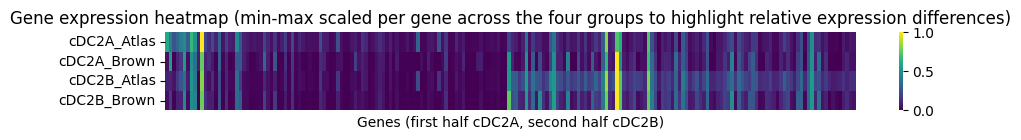

In [146]:
plt.figure(figsize=(10, 1.5))
sns.heatmap(heatmap_data_scaled, cmap="viridis", annot=False)
plt.title("Gene expression heatmap (min-max scaled per gene across the four groups to highlight relative expression differences)")
plt.ylabel("")
plt.xlabel("Genes (first half cDC2A, second half cDC2B)")
plt.xticks([], [])
plt.tight_layout()
plt.show()